# Loan Prediction 

In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [483]:
import os

In [484]:
os.getcwd()

'C:\\Users\\Vikrant'

In [485]:
pwd()

'C:\\Users\\Vikrant'

In [486]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 6034-31E3

 Directory of C:\Users\Vikrant

06/28/2023  12:03 PM    <DIR>          .
06/28/2023  12:03 PM    <DIR>          ..
10/09/2022  06:04 PM    <DIR>          .conda
10/09/2022  04:36 PM                25 .condarc
10/09/2022  04:35 PM    <DIR>          .continuum
06/27/2023  12:27 PM    <DIR>          .ipynb_checkpoints
10/09/2022  04:41 PM    <DIR>          .ipython
10/09/2022  04:40 PM    <DIR>          .jupyter
01/12/2023  05:36 PM    <DIR>          .keras
10/22/2022  11:54 AM    <DIR>          .matplotlib
10/08/2022  11:52 AM    <DIR>          3D Objects
01/29/2023  12:57 PM    <DIR>          6. Deep Learning
01/29/2023  12:54 PM    <DIR>          7. NLP
01/29/2023  12:39 PM        91,457,083 7. NLPvp.zip
12/11/2022  10:45 AM           223,234 Adult.csv
12/10/2022  07:06 PM         3,974,305 adult.data
12/11/2022  09:54 AM         2,003,153 adult.test.csv
10/09/2022  06:04 PM    <DIR>          anaconda3
12/09/2022  01:

In [487]:
df=pd.read_csv('Loan Prediction (Train).csv')

In [488]:
df.head()

Loan_ID   Sex Marital_Status No_Dependents Education_Status Self_Employed  \
0  LP001002  Male             No             0         Graduate            No   
1  LP001003  Male            Yes             1         Graduate            No   
2  LP001005  Male            Yes             0         Graduate           Yes   
3  LP001006  Male            Yes             0     Not Graduate            No   
4  LP001008  Male             No             0         Graduate            No   

   Income  Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
0    5849                 0.0          NaN   360.0             1.0   
1    4583              1508.0        128.0   360.0             1.0   
2    3000                 0.0         66.0   360.0             1.0   
3    2583              2358.0        120.0   360.0             1.0   
4    6000                 0.0        141.0   360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Sex                 601 non-null    object 
 2   Marital_Status      611 non-null    object 
 3   No_Dependents       599 non-null    object 
 4   Education_Status    614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Income              614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Tenure              600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


BY USING INFO METHOD ...WE GET THE IDEA ABOUT THE VARIABLES TYPES MEANS INTEGERS,OBJECTS OR FLOAT.. AND ALSO WE CAN SEE THERE ARE NULL VALUES ARE PRESENT

In [490]:
df.columns

Index(['Loan_ID', 'Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Income', 'Coapplicant_Income', 'Loan_Amount',
       'Tenure', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [491]:
df.index

RangeIndex(start=0, stop=614, step=1)

In [492]:
#renaming the variable:

df=df.rename(columns={'Sex':'Gender'})
df.head()

Loan_ID Gender Marital_Status No_Dependents Education_Status  \
0  LP001002   Male             No             0         Graduate   
1  LP001003   Male            Yes             1         Graduate   
2  LP001005   Male            Yes             0         Graduate   
3  LP001006   Male            Yes             0     Not Graduate   
4  LP001008   Male             No             0         Graduate   

  Self_Employed  Income  Coapplicant_Income  Loan_Amount  Tenure  \
0            No    5849                 0.0          NaN   360.0   
1            No    4583              1508.0        128.0   360.0   
2           Yes    3000                 0.0         66.0   360.0   
3            No    2583              2358.0        120.0   360.0   
4            No    6000                 0.0        141.0   360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

HERE WE CHANGE THE COLUMN NAME "SEX" TO "GENDER"

In [493]:
df = df.set_index('Loan_ID')


In [494]:
df.head()

Gender Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                       
LP001002   Male             No             0         Graduate            No   
LP001003   Male            Yes             1         Graduate            No   
LP001005   Male            Yes             0         Graduate           Yes   
LP001006   Male            Yes             0     Not Graduate            No   
LP001008   Male             No             0         Graduate            No   

          Income  Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                                     
LP001002    5849                 0.0          NaN   360.0             1.0   
LP001003    4583              1508.0        128.0   360.0             1.0   
LP001005    3000                 0.0         66.0   360.0             1.0   
LP001006    2583              2358.0        120.0   360.0             1.0   
LP001008    6000                 0.0        141.0   360.0             1.0   

         Property_Area Loan_Status  
Loan_ID                             
LP001002         Urban           Y  
LP001003         Rural           N  
LP001005         Urban           Y  
LP001006         Urban           Y  
LP001008         Urban           Y

In [495]:
#checking Unique values..
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [496]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [497]:
df['Marital_Status'].unique()

array(['No', 'Yes', nan], dtype=object)

In [498]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [499]:
df['No_Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [500]:
df['Education_Status'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [501]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [502]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

THIS ALL VARIBLES HAVING NULL VALUES WE HAVE TO FIX THIS NULL VALUES..

In [503]:
#checking the null value..

df.isnull().sum()

Gender                13
Marital_Status         3
No_Dependents         15
Education_Status       0
Self_Employed         32
Income                 0
Coapplicant_Income     0
Loan_Amount           22
Tenure                14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

CREDIT_HISTORY Variable is having more than 50  outliers

<AxesSubplot:ylabel='Loan_ID'>

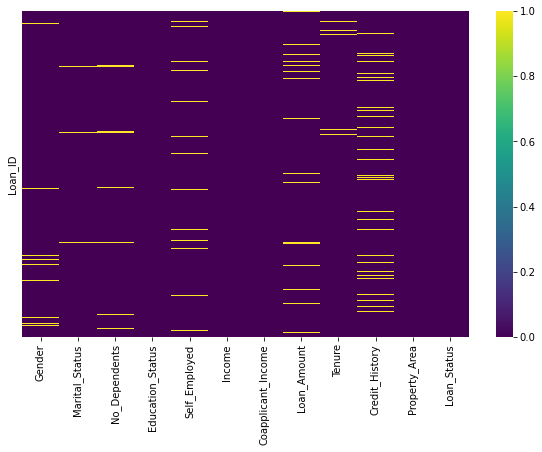

In [504]:
#null_values with the help of heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

which ever columns is having null we are going to replace with mean for numerical varibale & mode for categorical varibale.


# Null_value Treatment:

In [505]:
df['Gender'].value_counts() 

Male      489
Female    112
Name: Gender, dtype: int64

IN A Gender VARIABLE COLUMN 'MALE' CLASS IS MORE MEANS 79.64% IM OUR DATA,BECAUSE OF THAT WE ARE GOING TO TAKE 'MALE' CLASS AS MODE OF THAT VARIABLE FOR TREATING THE NULL_VALUES..

In [506]:
df['Gender'].fillna(value='Male',inplace=True)

In [507]:
df['Gender'].isnull().sum()               #Null_values are fixed...

0

In [508]:
df['Marital_Status'].value_counts()

Yes    398
No     213
Name: Marital_Status, dtype: int64

IN A Marital_Status VARIABLE COLUMN 'YES' CLASS IS MORE MEANS 64.82% IM OUR DATA,BECAUSE OF THAT WE ARE GOING TO TAKE 'YES' CLASS AS MODE OF THAT VARIABLE FOR TREATING THE NULL_VALUES..

In [509]:
df['Marital_Status'].fillna(value='Yes',inplace=True)

In [510]:
df['Marital_Status'].isnull().sum()            #Null_values are fixed...


0

In [511]:
df['No_Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: No_Dependents, dtype: int64

IN A NO_DEPENDENTS VARIABLE COLUMN 0_th CLASS IS MORE MEANS 56.18% IM OUR DATA,BECAUSE OF THAT WE ARE GOING TO TAKE 0_th CLASS

In [512]:
df['No_Dependents'].fillna(value='0',inplace=True)

In [513]:
df['No_Dependents'].isnull().sum()     #Null_values are fixed...

0

In [514]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

IN A Self_Employed VARIABLE COLUMN 'NO' CLASS IS MORE MEANS 81.43% IM OUR DATA,BECAUSE OF THAT WE ARE GOING TO TAKE 'NO' CLASS AS MODE OF THAT VARIABLE FOR TREATING THE NULL_VALUES



In [515]:
df['Self_Employed'].fillna(value='No',inplace=True)

In [516]:
df['Self_Employed'].isnull().sum()           #Null_values are fixed...


0

In [517]:
#here we are replacing null_values with mean because here variable is numerical:

df['Loan_Amount'].fillna(value=df['Loan_Amount'].mean(),inplace=True)


In [518]:
df['Loan_Amount'].isnull().sum()              #Null_values are fixed...

0

In [519]:
df['Tenure'].fillna(value=df['Tenure'].mean(),inplace=True)


In [520]:
df['Tenure'].isnull().sum()                         #Null_values are fixed...

0

In [521]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

A Credit_History VARIABLE COLUMN '1.0' CLASS IS MORE MEANS 77.36% IM OUR DATA,BECAUSE OF THAT WE ARE GOING TO TAKE '1.0' CLASS AS MODE OF THAT VARIABLE FOR TREATING THE NULL_VALUES

In [522]:
df['Credit_History'].fillna(value=1.0,inplace=True)

In [523]:
df['Credit_History'].isnull().sum()               #Null_values are fixed...

0

In [524]:
#here we can say that we fix the null_values:
df.isnull().sum()

Gender                0
Marital_Status        0
No_Dependents         0
Education_Status      0
Self_Employed         0
Income                0
Coapplicant_Income    0
Loan_Amount           0
Tenure                0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:ylabel='Loan_ID'>

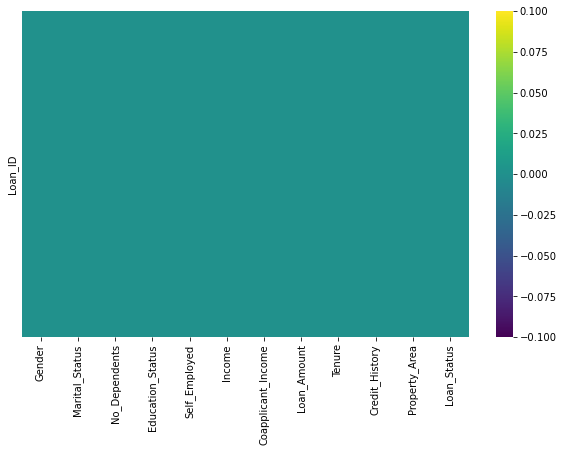

In [525]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

HERE WE CAN CLEARLY SEE THAT WE DEAL WITH ALL NULL VALUES..NO SINGLE NULL VALUE IS PRESENT THERE

# DERIVED_VARIABLE'S :

In [526]:
df['Total_Income']=df['Income']+df['Coapplicant_Income']


In [527]:
df.head()

Gender Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                       
LP001002   Male             No             0         Graduate            No   
LP001003   Male            Yes             1         Graduate            No   
LP001005   Male            Yes             0         Graduate           Yes   
LP001006   Male            Yes             0     Not Graduate            No   
LP001008   Male             No             0         Graduate            No   

          Income  Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                                     
LP001002    5849                 0.0   146.412162   360.0             1.0   
LP001003    4583              1508.0   128.000000   360.0             1.0   
LP001005    3000                 0.0    66.000000   360.0             1.0   
LP001006    2583              2358.0   120.000000   360.0             1.0   
LP001008    6000                 0.0   141.000000   360.0             1.0   

         Property_Area Loan_Status  Total_Income  
Loan_ID                                           
LP001002         Urban           Y        5849.0  
LP001003         Rural           N        6091.0  
LP001005         Urban           Y        3000.0  
LP001006         Urban           Y        4941.0  
LP001008         Urban           Y        6000.0

HERE WE CREATE THE NEW DERIVED VARIABLE 'TOTAL_INCOME' BY ADDING INCOME AND COAPPLICANT_INCOME

In [528]:
#creating Interest_variable with 9% annual interest:

Interest=9/12/100+1     #(per_month_interest)

In [529]:
Interest

1.0075

In [530]:
#creating new derived variable EMI..

#EMI = lOAN*Interest*(1+Interest)**TENURE/(1+Interest)**TENURE-1 

In [531]:
df['EMI']=(df['Loan_Amount']*Interest*(1+Interest)**df['Tenure']/(1+Interest)**df['Tenure']-1)

In [532]:
df.head()

Gender Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                       
LP001002   Male             No             0         Graduate            No   
LP001003   Male            Yes             1         Graduate            No   
LP001005   Male            Yes             0         Graduate           Yes   
LP001006   Male            Yes             0     Not Graduate            No   
LP001008   Male             No             0         Graduate            No   

          Income  Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                                     
LP001002    5849                 0.0   146.412162   360.0             1.0   
LP001003    4583              1508.0   128.000000   360.0             1.0   
LP001005    3000                 0.0    66.000000   360.0             1.0   
LP001006    2583              2358.0   120.000000   360.0             1.0   
LP001008    6000                 0.0   141.000000   360.0             1.0   

         Property_Area Loan_Status  Total_Income         EMI  
Loan_ID                                                       
LP001002         Urban           Y        5849.0  146.510253  
LP001003         Rural           N        6091.0  127.960000  
LP001005         Urban           Y        3000.0   65.495000  
LP001006         Urban           Y        4941.0  119.900000  
LP001008         Urban           Y        6000.0  141.057500

HERE WE CREATED A EMI VARIBALE WITH THE HELP OF LOAN_AMOUNT,INTEREST,TENURE

In [533]:
#HERE WE CREATING A BALANCE VARIABLE
#BALANCE = TOTAL_INCOME - EMI

In [534]:
#Total_balance
df['Balance'] = df['Total_Income']-df['EMI']
df.head()

Gender Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                       
LP001002   Male             No             0         Graduate            No   
LP001003   Male            Yes             1         Graduate            No   
LP001005   Male            Yes             0         Graduate           Yes   
LP001006   Male            Yes             0     Not Graduate            No   
LP001008   Male             No             0         Graduate            No   

          Income  Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                                     
LP001002    5849                 0.0   146.412162   360.0             1.0   
LP001003    4583              1508.0   128.000000   360.0             1.0   
LP001005    3000                 0.0    66.000000   360.0             1.0   
LP001006    2583              2358.0   120.000000   360.0             1.0   
LP001008    6000                 0.0   141.000000   360.0             1.0   

         Property_Area Loan_Status  Total_Income         EMI      Balance  
Loan_ID                                                                    
LP001002         Urban           Y        5849.0  146.510253  5702.489747  
LP001003         Rural           N        6091.0  127.960000  5963.040000  
LP001005         Urban           Y        3000.0   65.495000  2934.505000  
LP001006         Urban           Y        4941.0  119.900000  4821.100000  
LP001008         Urban           Y        6000.0  141.057500  5858.942500

In [535]:
#CHECKING MULTI_COLLINEARITY..
df.corr()

Income  Coapplicant_Income  Loan_Amount    Tenure  \
Income              1.000000           -0.116605     0.565620 -0.045242   
Coapplicant_Income -0.116605            1.000000     0.187828 -0.059675   
Loan_Amount         0.565620            0.187828     1.000000  0.038801   
Tenure             -0.045242           -0.059675     0.038801  1.000000   
Credit_History     -0.018615            0.011134    -0.001431  0.000432   
Total_Income        0.893037            0.342781     0.620102 -0.069830   
EMI                 0.565620            0.187828     1.000000  0.038801   
Balance             0.892833            0.343089     0.611935 -0.070911   

                    Credit_History  Total_Income       EMI   Balance  
Income                   -0.018615      0.893037  0.565620  0.892833  
Coapplicant_Income        0.011134      0.342781  0.187828  0.343089  
Loan_Amount              -0.001431      0.620102  1.000000  0.611935  
Tenure                    0.000432     -0.069830  0.038801 -0.070911  
Credit_History            1.000000     -0.012563 -0.001431 -0.012647  
Total_Income             -0.012563      1.000000  0.620102  0.999946  
EMI                      -0.001431      0.620102  1.000000  0.611935  
Balance                  -0.012647      0.999946  0.611935  1.000000

<AxesSubplot:>

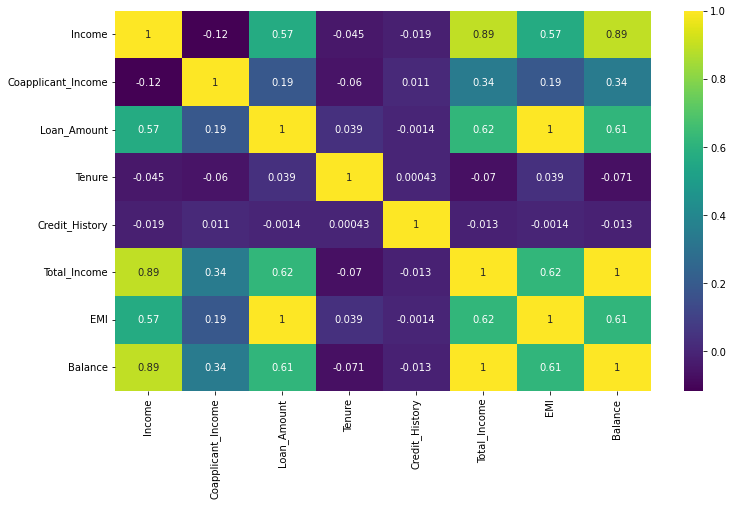

In [536]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),yticklabels=True,cmap='viridis',annot=True)

BY USING CORRELELOGRAM AND HEATMAP WE CAN CLEARLY SEE THAT
"TOTAL_INCOME" AND "INCOME" ARE HIGHLY 89% CO_RELATED WITH EACH OTHER,..... "LOAN_AMOUNT" AND "EMI" BOTH ARE HIGHLY 100% CO_RELATED WITH EACH OTHER, "INCOME" AND "BALANCE" BOTH ARE HIGHLY 89% CO_RELATED WITH EACH OTHER... THESE VARIABLES ARE HAVING MULTI_COLLINEARITY SO WE HAVE TO DROP SOME VARIABLE'S TO AVOID MULTI_COLLINEARITY.


In [537]:
#HERE WE DROPING A INCOME AND EMI VARIABLE's TO AVOID MULTICOLLINEARITY

df=df.drop('Income',axis=1)  
df.corr()

Coapplicant_Income  Loan_Amount    Tenure  Credit_History  \
Coapplicant_Income            1.000000     0.187828 -0.059675        0.011134   
Loan_Amount                   0.187828     1.000000  0.038801       -0.001431   
Tenure                       -0.059675     0.038801  1.000000        0.000432   
Credit_History                0.011134    -0.001431  0.000432        1.000000   
Total_Income                  0.342781     0.620102 -0.069830       -0.012563   
EMI                           0.187828     1.000000  0.038801       -0.001431   
Balance                       0.343089     0.611935 -0.070911       -0.012647   

                    Total_Income       EMI   Balance  
Coapplicant_Income      0.342781  0.187828  0.343089  
Loan_Amount             0.620102  1.000000  0.611935  
Tenure                 -0.069830  0.038801 -0.070911  
Credit_History         -0.012563 -0.001431 -0.012647  
Total_Income            1.000000  0.620102  0.999946  
EMI                     0.620102  1.000000  0.611935  
Balance                 0.999946  0.611935  1.000000

<AxesSubplot:>

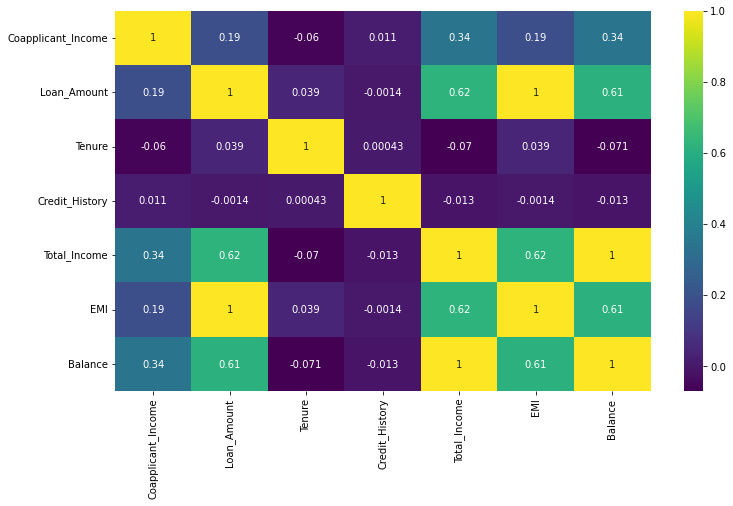

In [538]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),yticklabels=True,cmap='viridis',annot=True)

BY DROPING THE 'INCOME' AND 'Coapplicant_Income' WE DEAL WITH MULTI_COLLINEARITY



# OUTLIER_REMOVAL-

In [539]:
df.head()

Gender Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                       
LP001002   Male             No             0         Graduate            No   
LP001003   Male            Yes             1         Graduate            No   
LP001005   Male            Yes             0         Graduate           Yes   
LP001006   Male            Yes             0     Not Graduate            No   
LP001008   Male             No             0         Graduate            No   

          Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                             
LP001002                 0.0   146.412162   360.0             1.0   
LP001003              1508.0   128.000000   360.0             1.0   
LP001005                 0.0    66.000000   360.0             1.0   
LP001006              2358.0   120.000000   360.0             1.0   
LP001008                 0.0   141.000000   360.0             1.0   

         Property_Area Loan_Status  Total_Income         EMI      Balance  
Loan_ID                                                                    
LP001002         Urban           Y        5849.0  146.510253  5702.489747  
LP001003         Rural           N        6091.0  127.960000  5963.040000  
LP001005         Urban           Y        3000.0   65.495000  2934.505000  
LP001006         Urban           Y        4941.0  119.900000  4821.100000  
LP001008         Urban           Y        6000.0  141.057500  5858.942500

<AxesSubplot:xlabel='Total_Income'>

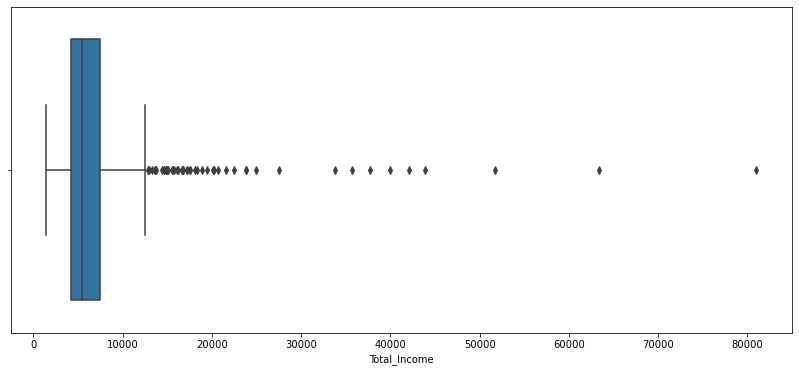

In [540]:
#univariate_analysis:

plt.figure(figsize=(14,6))
sns.boxplot(df['Total_Income'],data=df)

<AxesSubplot:xlabel='Balance'>

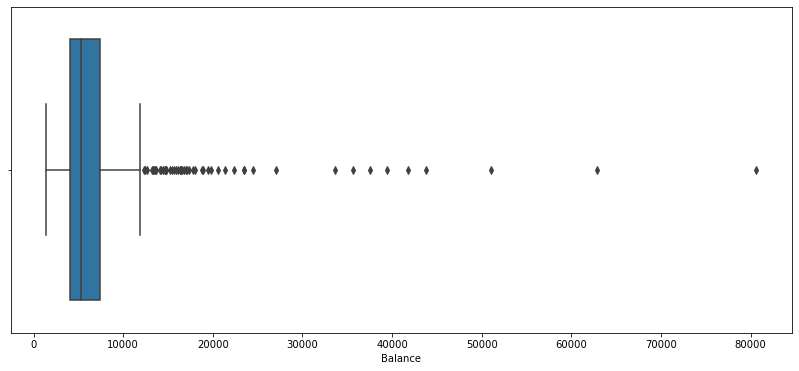

In [541]:
plt.figure(figsize=(14,6))
sns.boxplot(df['Balance'],data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income'>

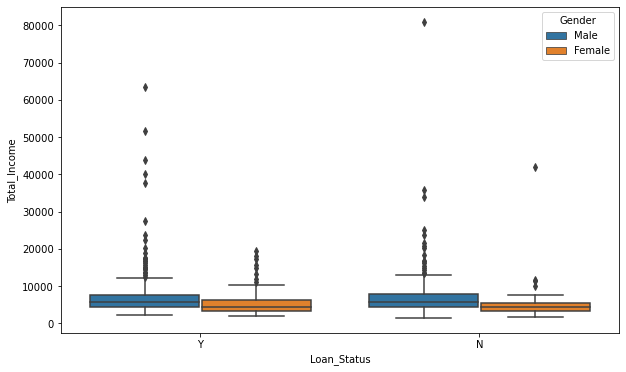

In [542]:
#Bivariate_analysis for outlier detection:

plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='Total_Income',data=df,hue='Gender')

WE CAN CLEARLY SEE BY USING BOX_PLOT,IN INCOME VARIABLE IN WHICH OUTLIERS ARE PRESENT IN BOTH MALE & FEMALE CATEGORIES ..SO WE NEED TO FIX THEM

<AxesSubplot:xlabel='Property_Area', ylabel='Total_Income'>

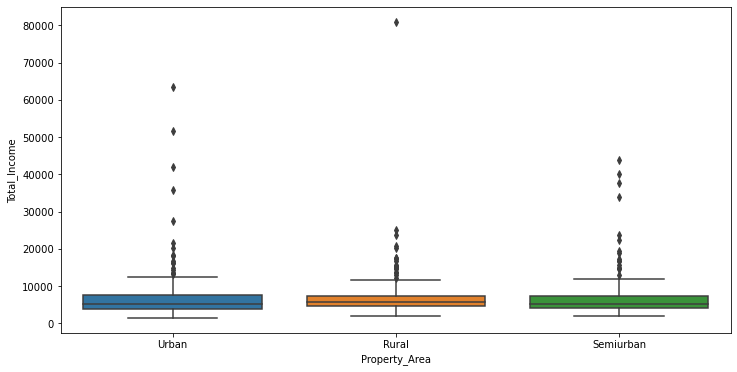

In [543]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Property_Area',y='Total_Income',data=df)

URBAN,RULAL & SEMI_URBAN SUBVARIABLES OF Property_Area ARE HAVING OUTLIERS IN INCOME

<AxesSubplot:xlabel='Gender', ylabel='Total_Income'>

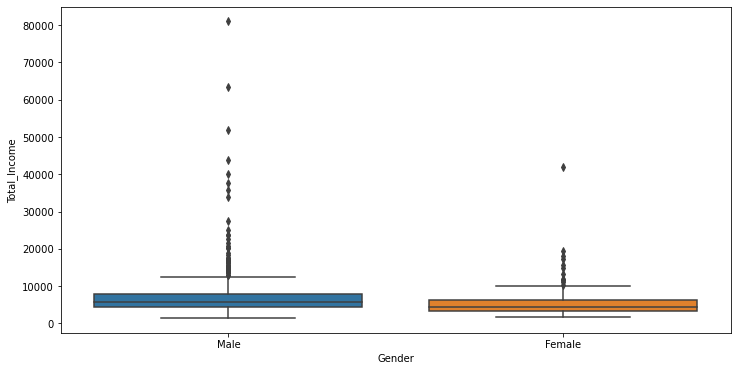

In [544]:
#Bivariate_analysis;
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender',y='Total_Income',data=df)


IN A GENDER COLUMN MALE CATEGORY IS HAVING MORE OUTLIERS AS COMPARE TO FEMALE CATEGORY..

<AxesSubplot:xlabel='Property_Area', ylabel='Total_Income'>

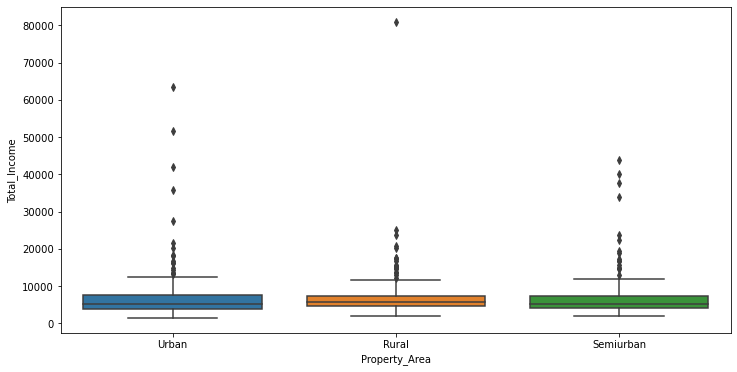

In [545]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Property_Area',y='Total_Income',data=df)

'Property_Area' HAVING OUTLIER'S IN 'Coapplicant_Income' VARIABLE..

In [546]:
plt.figure(figsize=(12,6))
sns.boxplot(x='No_Dependents',y='Total_Income',data=df)

<AxesSubplot:xlabel='No_Dependents', ylabel='Total_Income'>

In [547]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Loan_Status',y='Total_Income',data=df,hue='Gender')

<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income'>

HERE LOTS OF OUTLIER ARE PRESENT in OUR INCOME VARIABLE SO NEED TO FIX THEM..

<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income'>

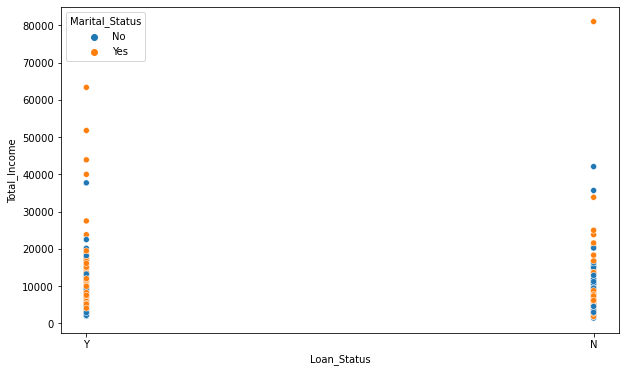

In [548]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Loan_Status',y='Total_Income',data=df,hue='Marital_Status')

<AxesSubplot:xlabel='Total_Income', ylabel='Loan_Status'>

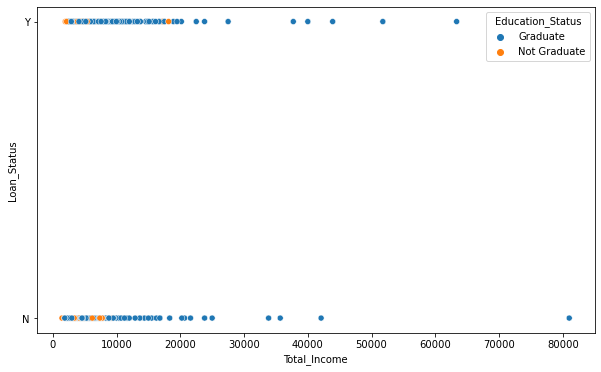

In [549]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total_Income',y='Loan_Status',data=df,hue='Education_Status')

BY PLOTTING DIFFERENT DIFFERENT GHAPHS ..INCOME COLUMN HAVING LOTS OF OUTLIERS

In [557]:
#definine The max range:

max_1=df['Balance'].quantile(0.90)
max_1

11202.025150000001

In [558]:
min_1=df['Balance'].quantile(0.10)
min_1

3140.831

In [559]:
df[df['Balance']>max_1].head()    #these are the outliers

Gender Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                        
LP001020    Male            Yes             1         Graduate            No   
LP001046    Male            Yes             1         Graduate            No   
LP001100    Male             No            3+         Graduate            No   
LP001186  Female            Yes             1         Graduate           Yes   
LP001318    Male            Yes             2         Graduate            No   

          Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                             
LP001020             10968.0        349.0   360.0             1.0   
LP001046              5625.0        315.0   360.0             1.0   
LP001100              3000.0        320.0   360.0             1.0   
LP001186                 0.0        286.0   360.0             0.0   
LP001318              5654.0        188.0   180.0             1.0   

         Property_Area Loan_Status  Total_Income       EMI     Balance  
Loan_ID                                                                 
LP001020     Semiurban           N       23809.0  350.6175  11206.4845  
LP001046         Urban           Y       11580.0  316.3625  11206.4845  
LP001100         Rural           N       15500.0  321.4000  11206.4845  
LP001186         Urban           N       11500.0  287.1450  11206.4845  
LP001318     Semiurban           Y       11904.0  188.4100  11206.4845

In [560]:
def remove_outlier(Balance):
    if Balance > max_1:
        return max_1
    else:
        return Balance
    #HERE WE ARE NOT TAKING MINIMUM RANGE BECAUSE WE CAN SEE THE BOX PLOT AND THERE IS NO OUTLIERS BELOW MINIMUM RANGE;

In [561]:
df['Balance']=df['Balance'].apply(remove_outlier)

In [562]:
df.head()

Gender Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                       
LP001002   Male             No             0         Graduate            No   
LP001003   Male            Yes             1         Graduate            No   
LP001005   Male            Yes             0         Graduate           Yes   
LP001006   Male            Yes             0     Not Graduate            No   
LP001008   Male             No             0         Graduate            No   

          Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                             
LP001002                 0.0   146.412162   360.0             1.0   
LP001003              1508.0   128.000000   360.0             1.0   
LP001005                 0.0    66.000000   360.0             1.0   
LP001006              2358.0   120.000000   360.0             1.0   
LP001008                 0.0   141.000000   360.0             1.0   

         Property_Area Loan_Status  Total_Income         EMI      Balance  
Loan_ID                                                                    
LP001002         Urban           Y        5849.0  146.510253  5702.489747  
LP001003         Rural           N        6091.0  127.960000  5963.040000  
LP001005         Urban           Y        3000.0   65.495000  2934.505000  
LP001006         Urban           Y        4941.0  119.900000  4821.100000  
LP001008         Urban           Y        6000.0  141.057500  5858.942500

<AxesSubplot:xlabel='Balance'>

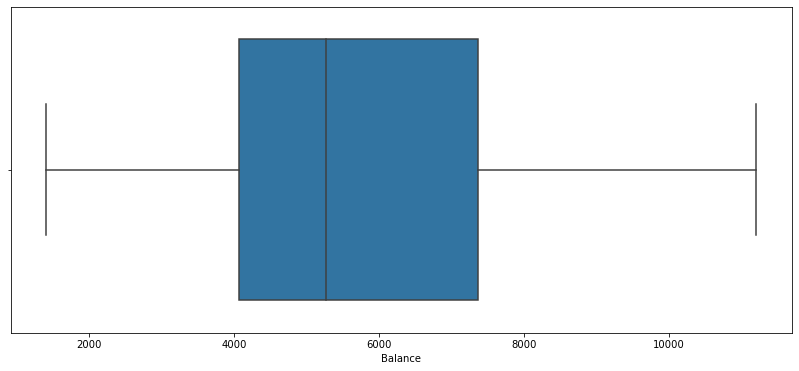

In [563]:
plt.figure(figsize=(14,6))
sns.boxplot(df['Balance'],data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='Balance'>

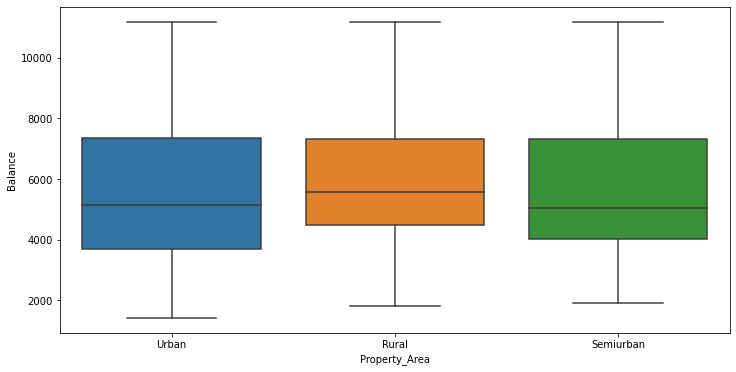

In [564]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Property_Area',y='Balance',data=df)

In [565]:
#WE NEED TO FIX THE OUTLIERS FROM 'TOTAL_INCOME' VARIABLE.
upper_limit = df['Total_Income'].quantile(0.90)
upper_limit

11462.800000000007

HERE WE ONLY TAKE UPPER LIMIT,WE ARE NOT TAKING LOWER LIMIT BECAUSE WE DONT HAVE ANY OUTLIER BELOW THE MINIMUM RANGE.



In [566]:
def fix_outliers(total_income):
    if total_income > upper_limit:
        return upper_limit
    else:
        return total_income

In [567]:
#fixing the outliers from Total Income variable;
df['Total_Income'] = df['Total_Income'].apply(fix_outliers)

<AxesSubplot:xlabel='Total_Income'>

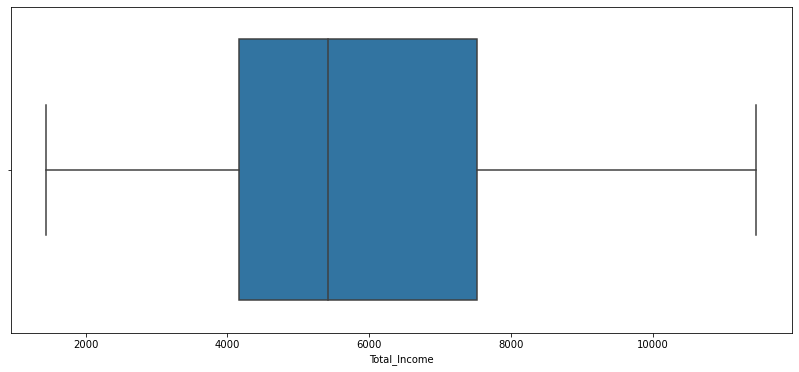

In [568]:
plt.figure(figsize=(14,6))
sns.boxplot(df['Total_Income'],data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='Total_Income'>

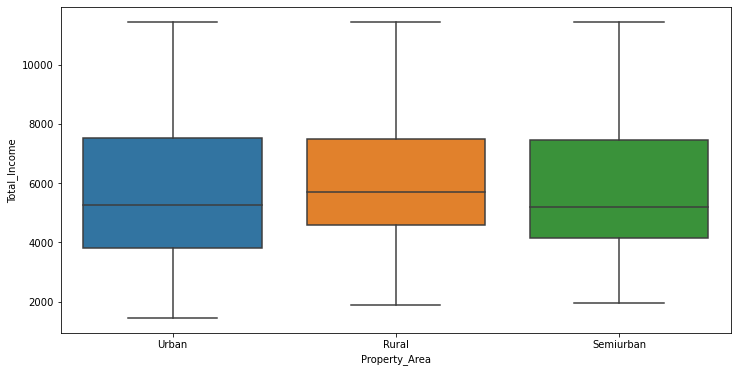

In [569]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Property_Area',y='Total_Income',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='Total_Income'>

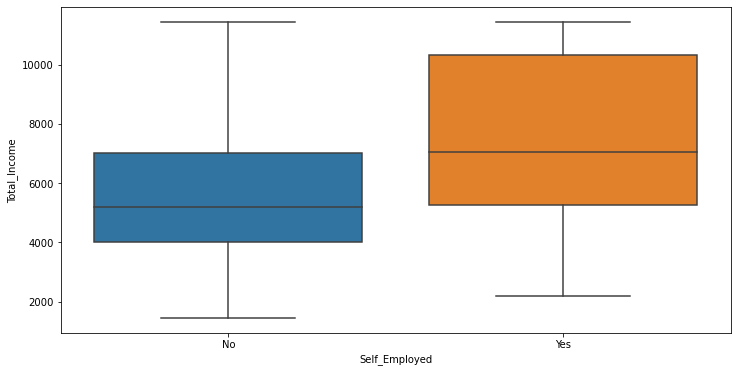

In [570]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Self_Employed',y='Total_Income',data=df)

AVERAGE INCOME OF THE PEOPLE IS LESS WHO ARE HAVING NO LOAN CLASS IS LESS AS COMPARE TO PEOPLE WHO ARE HAVING YES LOAN CLASS

WE CAN SEE THE BOX PLOT...WE DEAL WITH ALL OUTLIERS

# Distribution plots..

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

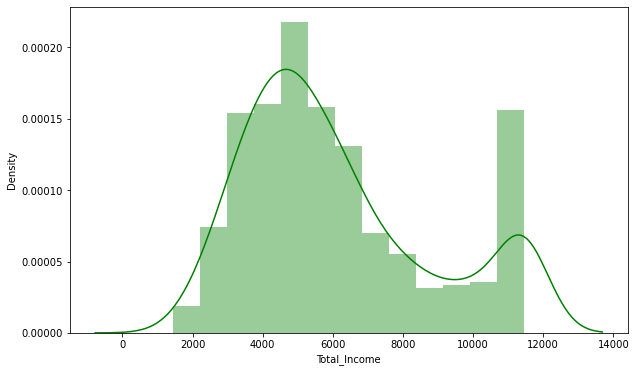

In [571]:
plt.figure(figsize=(10,6))
sns.distplot(df['Total_Income'],kde=True,hist=True,rug=False,color='green')

INCOME VARIABLE IS POSITIVELY SKEWED

In [232]:
plt.figure(figsize=(10,6))
sns.distplot(df['Loan_Amount'],kde=True,hist=True,rug=False,color='blue')

<AxesSubplot:xlabel='Loan_Amount', ylabel='Density'>

In [233]:
WE CAN SEE THAT INCOME VARIABLE IS POSITIVELY SKEWED...

SyntaxError: invalid syntax (3855407286.py, line 1)

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Total_Income'],kde=True,color='red')

HERE WE CAN SEE THAT FOR INCOME VARIABLE THE DISTRIBUTION IS POSITIVELY SKEWED...THAT MEAN'S 'MEAN>MEDIAN>MODE'


In [234]:
plt.figure(figsize=(10,6))
sns.distplot(df['Loan_Amount'],kde=True,hist=True,rug=False,color='green')
plt.xlim(0,400)

(0.0, 400.0)

LOAN_AMOUNT VARIABLE SLIGHTLY NORMALY DISTRIBUTED

In [235]:
plt.figure(figsize=(10,6))
sns.distplot(df['Balance'],kde=True,hist=True,rug=False,color='red')

<AxesSubplot:xlabel='Balance', ylabel='Density'>

In [236]:
plt.figure(figsize=(10,6))
sns.histplot(df['Balance'],kde=True,color='green',bins=100)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

# UNIVARIATE ANALYLIS..
In which we are doing the analysis on only one variable


In [237]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

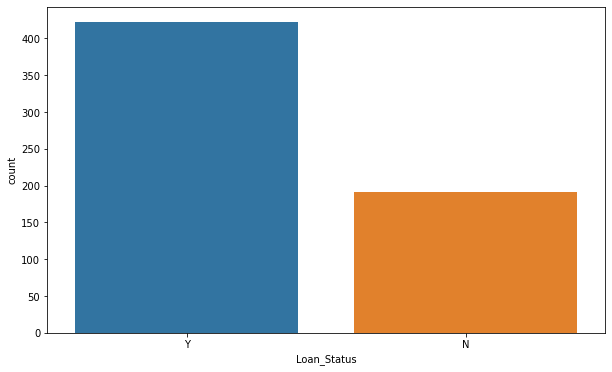

In [238]:
plt.figure(figsize=(10,6))
sns.countplot(x='Loan_Status',data=df)

PEOPLE WHO ARE GETTING LOAN STATUS ARE 68.72% MORE THAN PEOPLE WHO ARE NOT GETTING LOAN

In [239]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

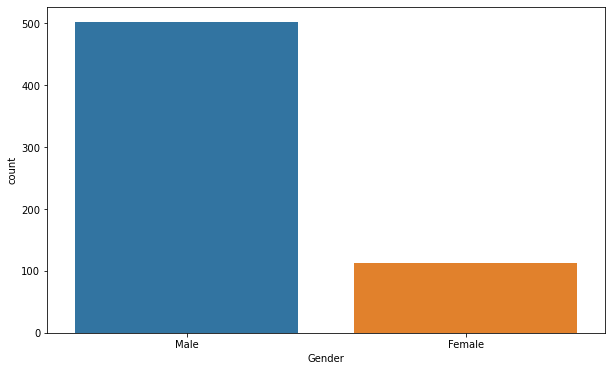

In [240]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=df)

In a whole population males are 81.75% and females are 18.25%. But here we cannot say, we are giving the loan on the basis of Gender because it is the clear case of discrimination


In [241]:
df['Education_Status'].value_counts()

Graduate        480
Not Graduate    134
Name: Education_Status, dtype: int64

<AxesSubplot:xlabel='Education_Status', ylabel='count'>

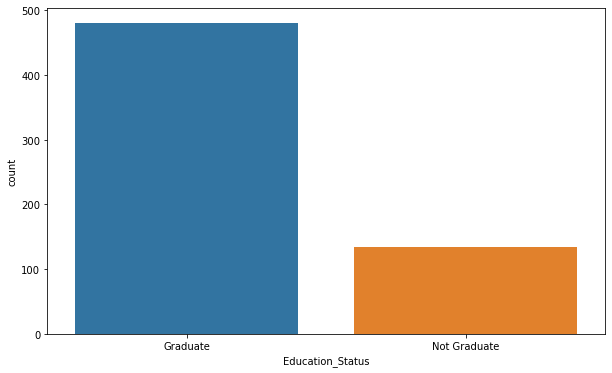

In [242]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education_Status',data=df)

In our data Graduated peoples are 78.30% and not Graduated peoples are 21.69%

In [243]:
df['Marital_Status'].value_counts()

Yes    401
No     213
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

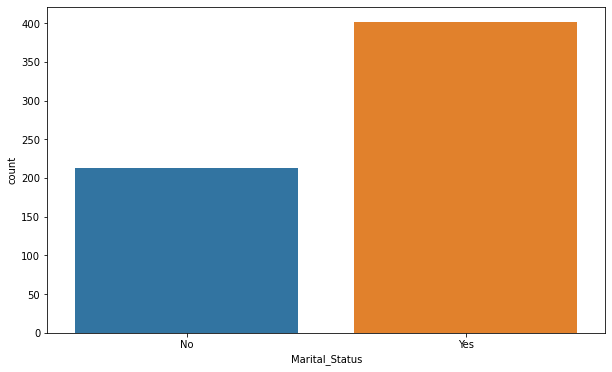

In [244]:
plt.figure(figsize=(10,6))
sns.countplot(x='Marital_Status',data=df)

IN whole population married people are 65.14% and unmarried people are 34.58%

In [245]:
df.head()

Gender Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                       
LP001002   Male             No             0         Graduate            No   
LP001003   Male            Yes             1         Graduate            No   
LP001005   Male            Yes             0         Graduate           Yes   
LP001006   Male            Yes             0     Not Graduate            No   
LP001008   Male             No             0         Graduate            No   

          Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                             
LP001002                 0.0   146.412162   360.0             1.0   
LP001003              1508.0   128.000000   360.0             1.0   
LP001005                 0.0    66.000000   360.0             1.0   
LP001006              2358.0   120.000000   360.0             1.0   
LP001008                 0.0   141.000000   360.0             1.0   

         Property_Area Loan_Status  Total_Income         EMI      Balance  
Loan_ID                                                                    
LP001002         Urban           Y        5849.0  146.510253  5702.489747  
LP001003         Rural           N        6091.0  127.960000  5963.040000  
LP001005         Urban           Y        3000.0   65.495000  2934.505000  
LP001006         Urban           Y        4941.0  119.900000  4821.100000  
LP001008         Urban           Y        6000.0  141.057500  5858.942500

In [246]:
df['No_Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: No_Dependents, dtype: int64

<AxesSubplot:xlabel='No_Dependents', ylabel='count'>

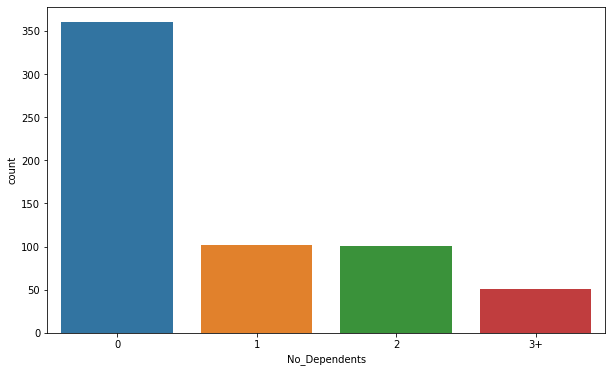

In [247]:
plt.figure(figsize=(10,6))
sns.countplot(x='No_Dependents',data=df)

In our data people with 0 Dependents are 58.72%,people with 1 dependents are 16.63%,people with 2 dependents are 16.47% And peoples with 3+ dependents are 0.831%.

In [248]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

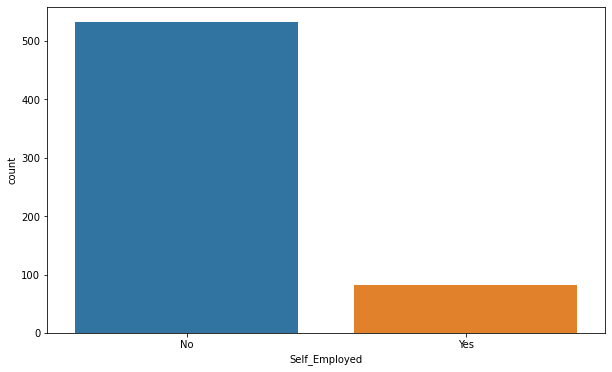

In [249]:
plt.figure(figsize=(10,6))
sns.countplot(x='Self_Employed',data=df)

In our whole data self Employed peoples are 13.21% and people who are no self Employed status having 13.21%

In [250]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

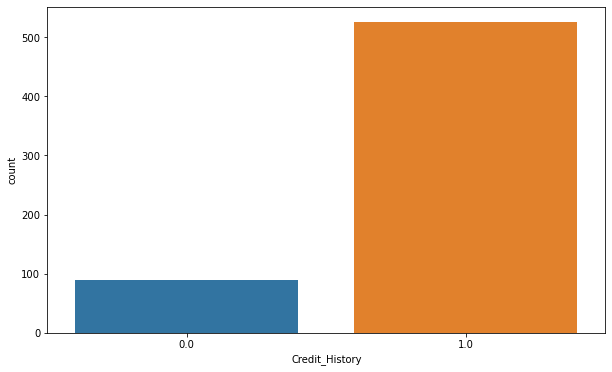

In [251]:
plt.figure(figsize=(10,6))
sns.countplot(x='Credit_History',data=df)

people who having credit history are 85.64% and people having no credit history are 14.35%

In [252]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

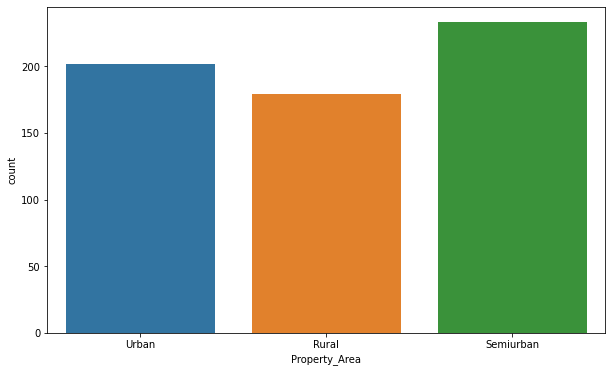

In [253]:
plt.figure(figsize=(10,6))
sns.countplot(x='Property_Area',data=df)

In our data people belonging to Semiurban area are 38.00%,people from Urban are 32.95% and people from Rular Area are 29.20%



In [254]:
df.head()

Gender Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                       
LP001002   Male             No             0         Graduate            No   
LP001003   Male            Yes             1         Graduate            No   
LP001005   Male            Yes             0         Graduate           Yes   
LP001006   Male            Yes             0     Not Graduate            No   
LP001008   Male             No             0         Graduate            No   

          Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                             
LP001002                 0.0   146.412162   360.0             1.0   
LP001003              1508.0   128.000000   360.0             1.0   
LP001005                 0.0    66.000000   360.0             1.0   
LP001006              2358.0   120.000000   360.0             1.0   
LP001008                 0.0   141.000000   360.0             1.0   

         Property_Area Loan_Status  Total_Income         EMI      Balance  
Loan_ID                                                                    
LP001002         Urban           Y        5849.0  146.510253  5702.489747  
LP001003         Rural           N        6091.0  127.960000  5963.040000  
LP001005         Urban           Y        3000.0   65.495000  2934.505000  
LP001006         Urban           Y        4941.0  119.900000  4821.100000  
LP001008         Urban           Y        6000.0  141.057500  5858.942500

<AxesSubplot:xlabel='Gender', ylabel='count'>

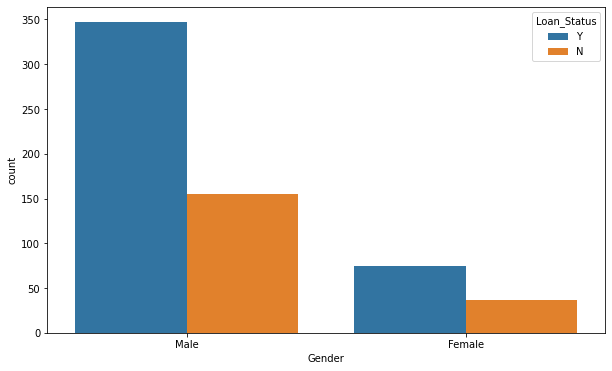

In [255]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=df,hue='Loan_Status')

Male's who having loan status are Appx equal to 55.56% & Male's who having 'No' loan Status are Appx Equal to 24.46%... Female's who having loan status are Appx equal to 09.78% & Female's who having 'No' loan Status are Appx Equal to 04.07%.

In [256]:
df['Marital_Status'].value_counts()

Yes    401
No     213
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Education_Status', ylabel='count'>

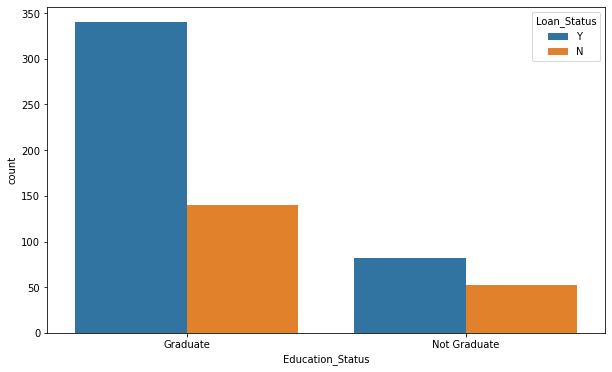

In [257]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education_Status',data=df,hue='Loan_Status')

Graduated people with 'yes' loan status are 55.37% and Graduated people with 'No' Loan Status are 22.80%... Not Graduated with 'yes' loan status are 12.21% And Not Graduated people with 'No' loan Status are 08.14%.

In [258]:
df['Marital_Status'].value_counts()

Yes    401
No     213
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

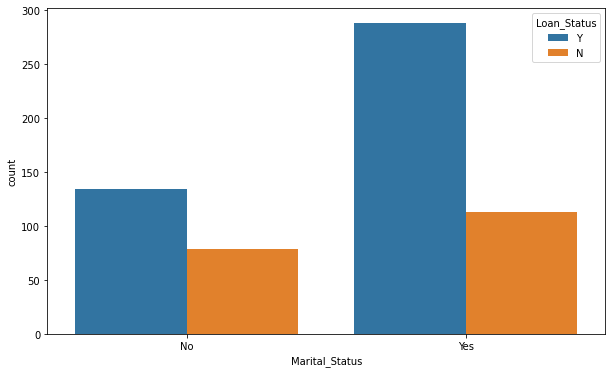

In [259]:
plt.figure(figsize=(10,6))
sns.countplot(x='Marital_Status',data=df,hue='Loan_Status')

UnMarried people with 'yes' loan status are 22.80% and UnMarried people with 'No' Loan Status are 13.02%... Married with 'yes' loan status are 45.60% And Married people with 'No' loan Status are 19.54%.

In [260]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [261]:
plt.figure(figsize=(10,6))
sns.countplot(x='Property_Area',data=df,hue='Loan_Status',palette='Paired')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

People having 'Yes' loan Status with 'Semiurban' Property_Area are 28.50%,'Urban' Property_Area are 21.17%,'Rular' Property_Area are 18.72% ... People having 'No' loan Status with 'Urban' Property_Area are 11.07%,'Rular' Property_Area are 10.26%,'Semiurban' Property_Area are 08.14%

<AxesSubplot:xlabel='No_Dependents', ylabel='count'>

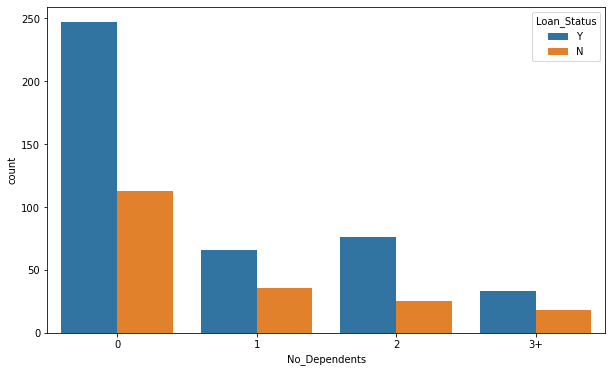

In [262]:
plt.figure(figsize=(10,6))
sns.countplot(x='No_Dependents',data=df,hue='Loan_Status')

People having 'Yes' loan Status with '0' Dependents are 23.61%,'1' dependents are 10.58%,'2' Dependets are 12.21% and '3' Dependents are 04.88%... People having 'No' loan Status with '0' Dependents are 17.91%,'1' dependents are 05.04%,'2' Dependets are 04.07% and '3' Dependents are 03.25%...

In [263]:
plt.figure(figsize=(10,6))
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status',palette='Paired')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

Employed people with 'yes' loan status are 57.81% and Employed people with 'No' Loan Status are 25.24%... Unemployed with 'yes' loan status are 08.14% And Unemployed people with 'No' loan Status are 03.25%.

In [264]:
plt.figure(figsize=(10,6))
sns.barplot(y='Total_Income',x='Gender',data=df,estimator=np.mean)

<AxesSubplot:xlabel='Gender', ylabel='Total_Income'>

Average Total Income of the males is Appx equal to 6000 and females is 5000.

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Income'>

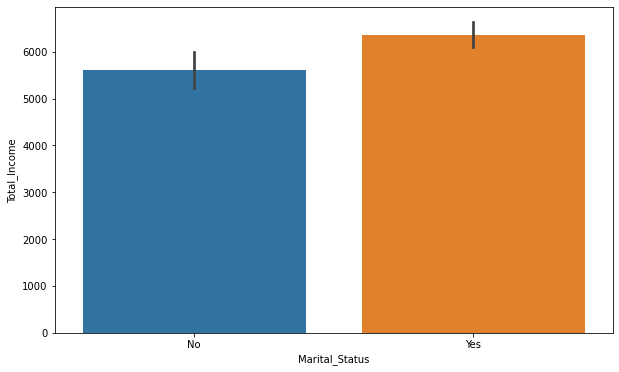

In [265]:
plt.figure(figsize=(10,6))
sns.barplot(y='Total_Income',x='Marital_Status',data=df,estimator=np.mean)

Average Total Income of Married People is Appx equal to 7000 and females is 6200

# BIVARIATE ANALYSIS:
**SCATTER_PLOT;**

A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

Scatter plot's are used to observe and show relationships between two numeric variables.


<AxesSubplot:xlabel='Loan_Amount', ylabel='Total_Income'>

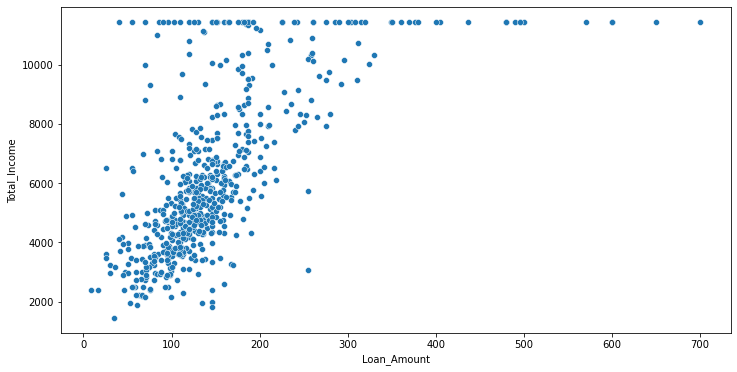

In [266]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Loan_Amount',y='Total_Income',data=df)

In [267]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Loan_Amount',y='Total_Income',data=df,hue='Gender')

<AxesSubplot:xlabel='Loan_Amount', ylabel='Total_Income'>

In [268]:
using scatter plot we can see that as total_income increases loan_amount also increases

SyntaxError: invalid syntax (2485149812.py, line 1)

In [269]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Loan_Amount',y='Total_Income',data=df,hue='Marital_Status')

<AxesSubplot:xlabel='Loan_Amount', ylabel='Total_Income'>

Relation between ‘Total_Income’ and ‘Loan Amount’ is having positive co-relation means ‘balance’ increases ‘Loan Amount’ also increases with respect to ‘Marital_Status’.


<AxesSubplot:xlabel='Loan_Amount', ylabel='Total_Income'>

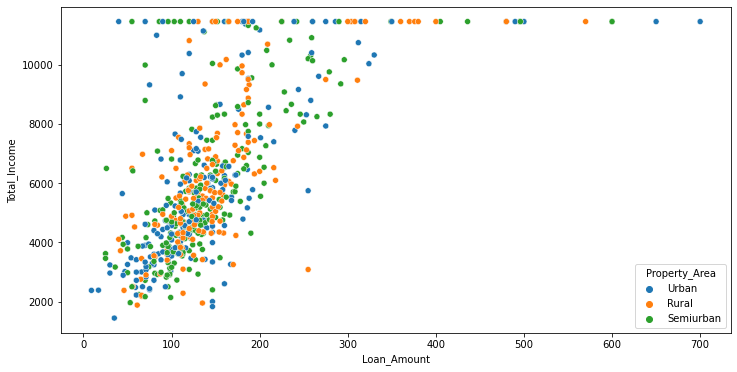

In [270]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Loan_Amount',y='Total_Income',data=df,hue='Property_Area')

USING SCATTER_PLOT WE CAN SEE THE SPREAD OF OUR DATA WITH RESPECT TO "Property_Area"

In [275]:
df.head()

Gender Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                       
LP001002   Male             No             0         Graduate            No   
LP001003   Male            Yes             1         Graduate            No   
LP001005   Male            Yes             0         Graduate           Yes   
LP001006   Male            Yes             0     Not Graduate            No   
LP001008   Male             No             0         Graduate            No   

          Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                             
LP001002                 0.0   146.412162   360.0             1.0   
LP001003              1508.0   128.000000   360.0             1.0   
LP001005                 0.0    66.000000   360.0             1.0   
LP001006              2358.0   120.000000   360.0             1.0   
LP001008                 0.0   141.000000   360.0             1.0   

         Property_Area Loan_Status  Total_Income         EMI      Balance  
Loan_ID                                                                    
LP001002         Urban           Y        5849.0  146.510253  5702.489747  
LP001003         Rural           N        6091.0  127.960000  5963.040000  
LP001005         Urban           Y        3000.0   65.495000  2934.505000  
LP001006         Urban           Y        4941.0  119.900000  4821.100000  
LP001008         Urban           Y        6000.0  141.057500  5858.942500

In [276]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Loan_Amount',y='Balance',data=df,hue='Credit_History')

<AxesSubplot:xlabel='Loan_Amount', ylabel='Balance'>

USING SCATTER_PLOT WE CAN SEE THE SPREAD OF OUR "BALANCE & LOAN_AMOUNT" VARIABLES WITH RESPECT TO "Gender"


<AxesSubplot:xlabel='Loan_Amount', ylabel='Total_Income'>

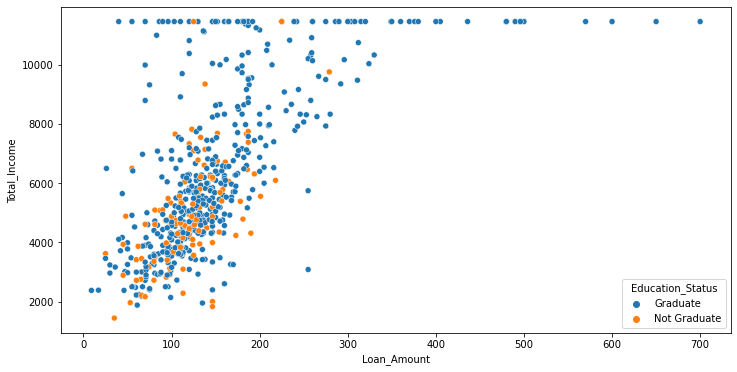

In [277]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Loan_Amount',y='Total_Income',data=df,hue='Education_Status')

Relation between ‘Balance’ and ‘Loan Amount’ is having positive co-relation means ‘balance’ increases ‘Loan Amount’ also increases with respect to ‘Education Status’.


<AxesSubplot:xlabel='Loan_Amount', ylabel='Balance'>

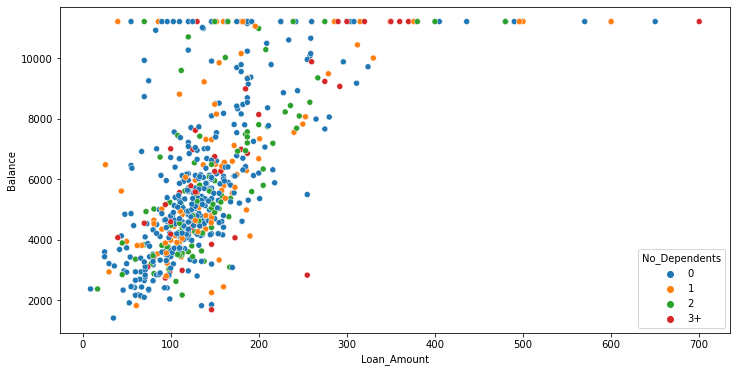

In [274]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Loan_Amount',y='Balance',data=df,hue='No_Dependents')

Relation between ‘Balance’ and ‘Loan Amount’ is having positive co-relation means ‘balance’ increases ‘Loan Amount’ also increases with respect to 'No_Dependents'

# COMPARISON_PLOTS

<Figure size 864x432 with 0 Axes>

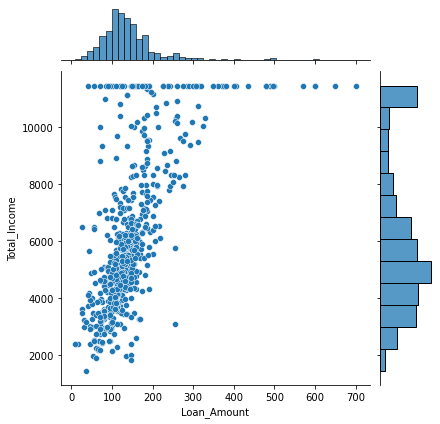

In [279]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Loan_Amount',y='Total_Income',data=df)

BY COMPARISION PLOT WE CAN SEE THAT OUR INCOME VARIABLE IS POSITIVELY SKEWED WITH RESPECT TO LOAN_AMOUNT VARIABLE

<Figure size 864x432 with 0 Axes>

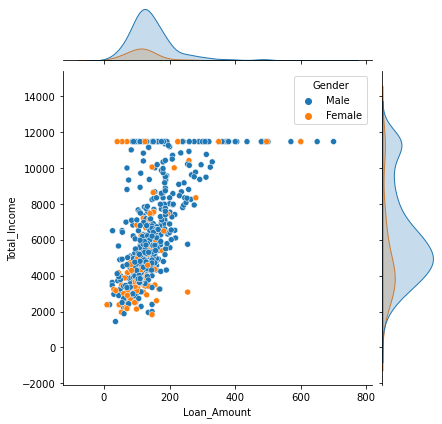

In [281]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Loan_Amount',y='Total_Income',data=df,hue='Gender')

BY PLOTTING JOINT PLOT WE CAN SEE THAT WE SUCCESEFULLY DEAL WITH OUTLIERS AND JOINT PLOT GIVES THE IDEA ABOUT DISTRIBUTION OF OUR VARIABLES

<Figure size 864x432 with 0 Axes>

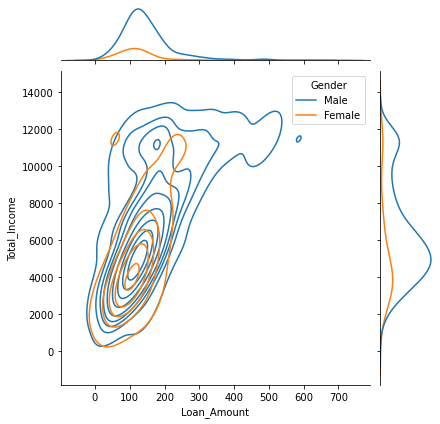

In [282]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Loan_Amount',y='Total_Income',data=df,hue='Gender',kind='kde')

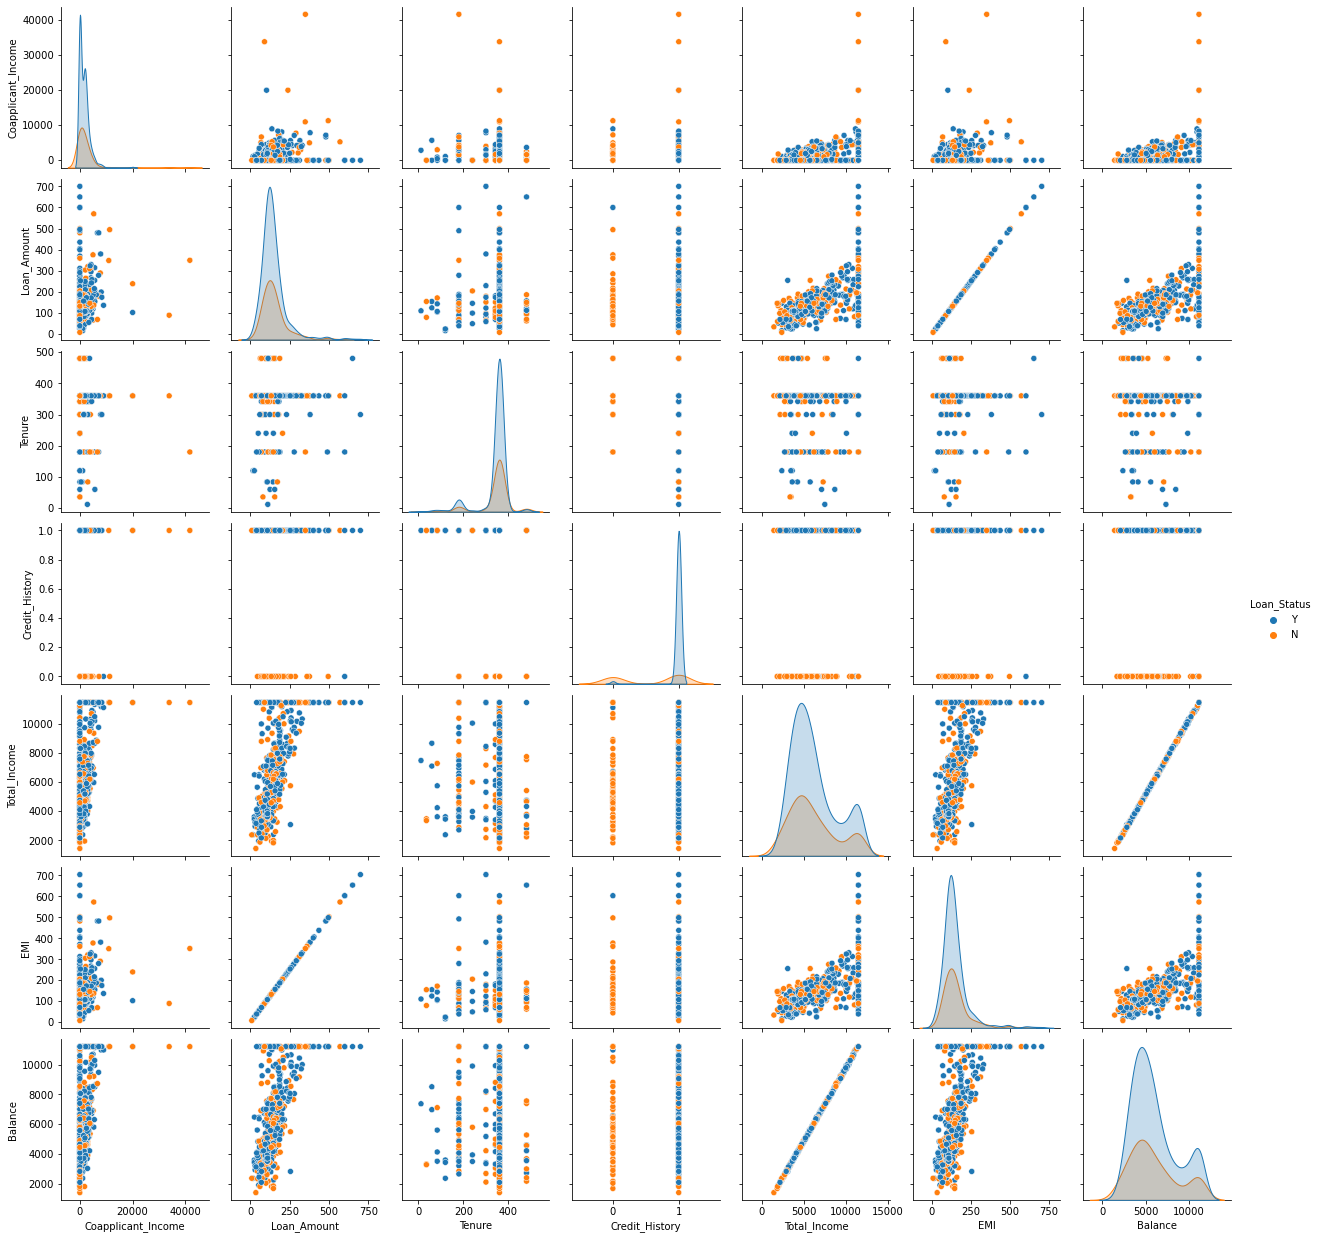

In [283]:
sns.pairplot(df,hue='Loan_Status')

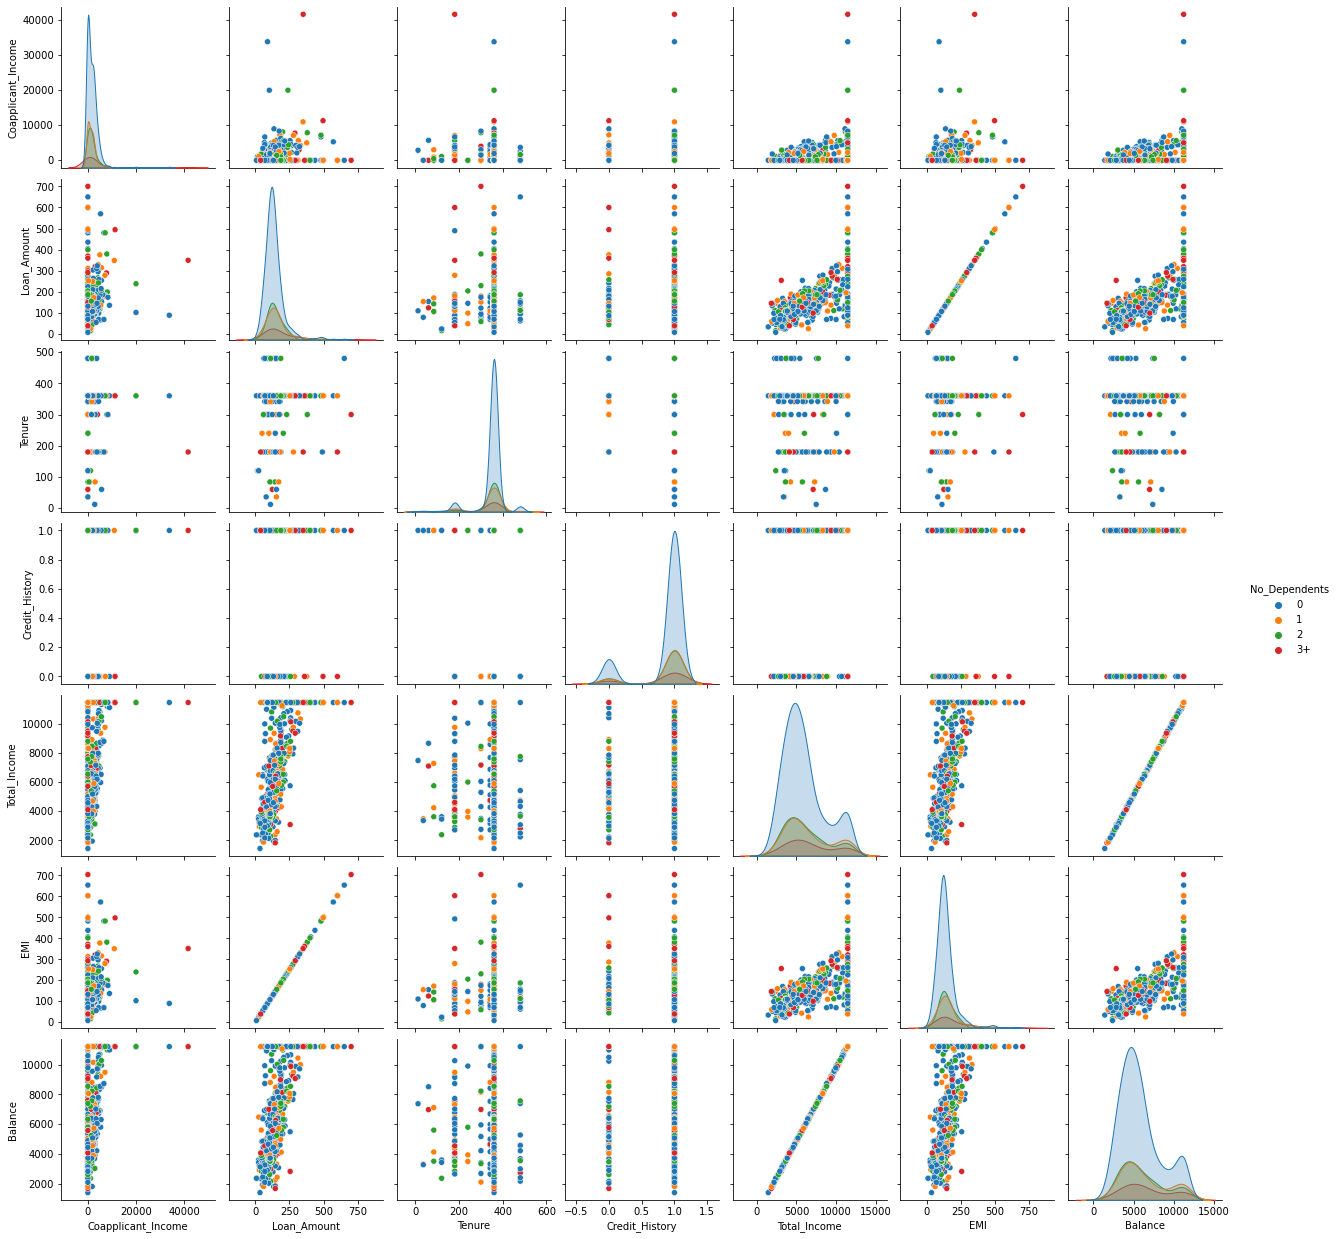

In [284]:
sns.pairplot(df,hue='No_Dependents')

# Dummie_variable_trapp :-

In [572]:
pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True).head()

Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                             
LP001002                 0.0   146.412162   360.0             1.0   
LP001003              1508.0   128.000000   360.0             1.0   
LP001005                 0.0    66.000000   360.0             1.0   
LP001006              2358.0   120.000000   360.0             1.0   
LP001008                 0.0   141.000000   360.0             1.0   

          Total_Income         EMI      Balance  Gender_Male  \
Loan_ID                                                        
LP001002        5849.0  146.510253  5702.489747            1   
LP001003        6091.0  127.960000  5963.040000            1   
LP001005        3000.0   65.495000  2934.505000            1   
LP001006        4941.0  119.900000  4821.100000            1   
LP001008        6000.0  141.057500  5858.942500            1   

          Marital_Status_Yes  No_Dependents_1  No_Dependents_2  \
Loan_ID                                                          
LP001002                   0                0                0   
LP001003                   1                1                0   
LP001005                   1                0                0   
LP001006                   1                0                0   
LP001008                   0                0                0   

          No_Dependents_3+  Education_Status_Not Graduate  Self_Employed_Yes  \
Loan_ID                                                                        
LP001002                 0                              0                  0   
LP001003                 0                              0                  0   
LP001005                 0                              0                  1   
LP001006                 0                              1                  0   
LP001008                 0                              0                  0   

          Property_Area_Semiurban  Property_Area_Urban  
Loan_ID                                                 
LP001002                        0                    1  
LP001003                        0                    0  
LP001005                        0                    1  
LP001006                        0                    1  
LP001008                        0                    1

USING DUMMY_VARIABLES HERE WE AVOID THE DUMMY_VARIABLE TRAP

In [573]:
#DEFINING THE INDEPENDENT AND INDEPENDENT VARIABLES :
x=pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)      #INDEPENDENT_VARIABLE
y=df['Loan_Status']


In [574]:
print(x.shape)
print(y.shape)

(614, 16)
(614,)


# Model Building

In [575]:
#TRAIN TEST SPLIT:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 16)
(429,)
(185, 16)
(185,)


In [576]:
#STANDARD SCALER:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()                            #standard scaler object
scaler_train = scaler.fit_transform(X_train)
scaler_test = scaler.transform(X_test)

In [577]:
scaler_train

array([[-0.52979718,  0.14646144,  0.30369442, ..., -0.38348249,
        -0.79837621,  1.4444137 ],
       [-0.52979718, -0.01238125,  0.30369442, ..., -0.38348249,
        -0.79837621,  1.4444137 ],
       [-0.52979718, -0.37959142,  0.30369442, ..., -0.38348249,
         1.25254232, -0.69232243],
       ...,
       [-0.39133619, -0.46142187, -3.95882736, ..., -0.38348249,
        -0.79837621,  1.4444137 ],
       [ 0.85180916,  0.33350246,  0.30369442, ...,  2.60768096,
        -0.79837621, -0.69232243],
       [ 1.62250522,  3.88728183,  0.30369442, ...,  2.60768096,
        -0.79837621, -0.69232243]])

In [291]:
scaler_test

array([[ 0.01083139, -0.14579015,  0.30369442, ..., -0.38348249,
        -0.79837621, -0.69232243],
       [-0.17928966, -0.59001257,  0.30369442, ..., -0.38348249,
         1.25254232, -0.69232243],
       [ 0.4613552 , -0.0639597 , -2.47621109, ..., -0.38348249,
        -0.79837621, -0.69232243],
       ...,
       [-0.36881   , -0.95240454,  0.30369442, ..., -0.38348249,
        -0.79837621, -0.69232243],
       [ 0.00572545, -0.02888951,  0.30369442, ..., -0.38348249,
        -0.79837621, -0.69232243],
       [-0.52979718, -1.08099524,  0.30369442, ..., -0.38348249,
         1.25254232, -0.69232243]])

In [292]:
print(scaler_train.shape)
print(scaler_test.shape)

(429, 16)
(185, 16)


SHAPE OF STANDARD SCALER TRAIN IS 429 ROW'S,17 COLS AND STANDARD SCALER TEST IS 185 ROW'S,17 COLS.

# Logistic Regression Model

In [293]:
#LOGISTIC_MODEL_1 WITH STANDARD_SCALER
from sklearn.linear_model import LogisticRegression      #HERE WE IMPORTING LOGISTIC REGRESSION MODEL FROM SK-LEARN
log_model_1 = LogisticRegression()                                #Logistic Regression Object

log_model_1=log_model_1.fit(scaler_train,y_train)                 

log_pred_1=log_model_1.predict(scaler_test)                       #Predicting the test record's

In [294]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve,accuracy_score
#ACCURACY_OF_OUR_LOGISTIC_MODEL  
#model_1   (with test_size=0.3)

print(accuracy_score(y_test,log_pred_1))
print(confusion_matrix(y_test,log_pred_1))

0.7783783783783784
[[ 26  38]
 [  3 118]]


ACCURACY OF OUR LOGISTIC REGRESSION IS 77.83%

In [295]:
print(classification_report(log_pred_1,y_test))


              precision    recall  f1-score   support

           N       0.41      0.90      0.56        29
           Y       0.98      0.76      0.85       156

    accuracy                           0.78       185
   macro avg       0.69      0.83      0.71       185
weighted avg       0.89      0.78      0.81       185



In [296]:
plot_confusion_matrix(log_model_1,scaler_test,y_test)

In [297]:
#TO CHECK WHETHER OUR MODEL PREDICTING WEL OR NOT:-
#FOR TRAINING DATA
X_train.iloc[0]

Coapplicant_Income                  0.0
Loan_Amount                       160.0
Tenure                            360.0
Credit_History                      1.0
Total_Income                     2600.0
EMI                               160.2
Balance                          2439.8
Gender_Male                         0.0
Marital_Status_Yes                  0.0
No_Dependents_1                     1.0
No_Dependents_2                     0.0
No_Dependents_3+                    0.0
Education_Status_Not Graduate       0.0
Self_Employed_Yes                   0.0
Property_Area_Semiurban             0.0
Property_Area_Urban                 1.0
Name: LP002341, dtype: float64

In [298]:
y_train.iloc[0]

'N'

In [299]:
log_model_1.predict_proba(X_train.iloc[0].values.reshape(1,-1))

array([[0., 1.]])

In [300]:
log_model_1.predict(X_train.iloc[0].values.reshape(1,-1))

array(['Y'], dtype=object)

In [301]:
#FOR TEST_DATA:
X_test.iloc[3]

Coapplicant_Income                   0.0000
Loan_Amount                        187.0000
Tenure                             360.0000
Credit_History                       0.0000
Total_Income                     10416.0000
EMI                                187.4025
Balance                          10228.5975
Gender_Male                          1.0000
Marital_Status_Yes                   0.0000
No_Dependents_1                      0.0000
No_Dependents_2                      0.0000
No_Dependents_3+                     0.0000
Education_Status_Not Graduate        0.0000
Self_Employed_Yes                    1.0000
Property_Area_Semiurban              0.0000
Property_Area_Urban                  1.0000
Name: LP002403, dtype: float64

In [302]:
y_test.iloc[8]

'N'

In [303]:
log_model_1.predict_proba(X_test.iloc[4].values.reshape(1,-1))

array([[1.00000000e+00, 3.07772673e-61]])

In [304]:
log_model_1.predict(X_test.iloc[8].values.reshape(1,-1))

array(['Y'], dtype=object)

HERE WE CAN SEE THAT OUR MODEL PREDICTING WEL ..

In [305]:
from sklearn.metrics import plot_roc_curve,precision_recall_curve,plot_precision_recall_curve

In [306]:
plot_roc_curve(log_model_1,scaler_test,y_test)

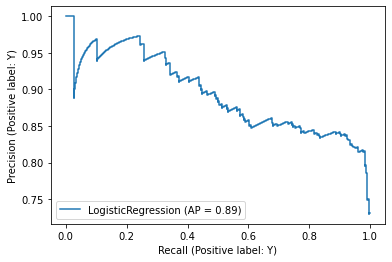

In [307]:
plot_precision_recall_curve(log_model_1,scaler_train,y_train)

In [308]:
#MODEL_WITHOUT SCALING

In [309]:
from sklearn.model_selection import train_test_split                     #train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [310]:
log_model_2 = LogisticRegression()
log_model_2.fit(X_train,y_train)
model_pred_2=log_model_2.predict(X_test)

In [311]:
print(accuracy_score(model_pred_2,y_test))     

0.7621621621621621


ACCURACY OF LR MODEL WITHOUT SCALING IS 77.83%

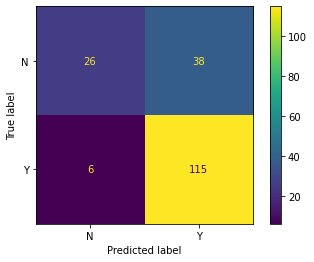

In [312]:
plot_confusion_matrix(log_model_2,X_test,y_test)

In [313]:
print(classification_report(y_test,model_pred_2))

              precision    recall  f1-score   support

           N       0.81      0.41      0.54        64
           Y       0.75      0.95      0.84       121

    accuracy                           0.76       185
   macro avg       0.78      0.68      0.69       185
weighted avg       0.77      0.76      0.74       185



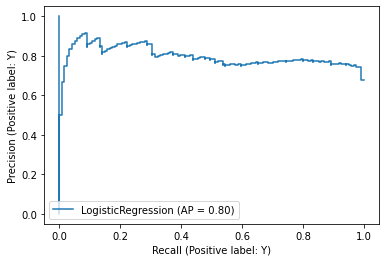

In [314]:
plot_precision_recall_curve(log_model_2,X_test,y_test)

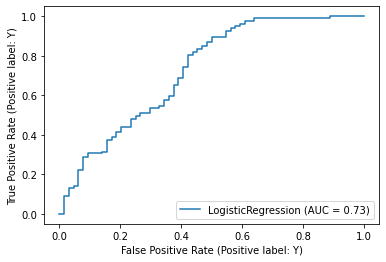

In [315]:
plot_roc_curve(log_model_2,X_test,y_test)

In [316]:
#model_with (test_size=0.2):
from sklearn.model_selection import train_test_split                     #train_test_split

In [317]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
log_model_3 = LogisticRegression()
log_model_3.fit(X_train,y_train)
log_model_3=log_model_2.predict(X_test)

In [318]:
#logistic_model_2
accuracy_score(log_model_3,y_test)          #ACCURACY OF LOGISTIC MODEL

0.7642276422764228

In [319]:
print(classification_report(y_test,log_model_3))

              precision    recall  f1-score   support

           N       0.81      0.47      0.59        45
           Y       0.75      0.94      0.83        78

    accuracy                           0.76       123
   macro avg       0.78      0.70      0.71       123
weighted avg       0.77      0.76      0.75       123



In [320]:
confusion_matrix(y_test,log_model_3)

array([[21, 24],
       [ 5, 73]], dtype=int64)

In [321]:
#LOGISTIC MODEL_3         (MODEL WITH LOG TRANSFORM)
from sklearn.model_selection import train_test_split                     #train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
from sklearn.preprocessing import FunctionTransformer

In [322]:
log_transform = FunctionTransformer()
X_train_transform = log_transform.fit_transform(X_train)
X_test_transform = log_transform.transform(X_test)

In [323]:
print(X_train_transform.shape)                               #SHAPE OF THE TRANSFORMED X TRAIN
print(y_train.shape)                                         #SHAPE OF THE Y TRAIN
print(X_test_transform.shape)                                #SHAPE OF THE TRANSFORMED X TEST
print(y_test.shape)                                  ##SHAPE OF THE Y TEST

(491, 16)
(491,)
(123, 16)
(123,)


In [324]:
log_transform = LogisticRegression()
log_transform.fit(X_train_transform,y_train)
log_y_pred = log_transform.predict(X_test_transform)

In [325]:
print(accuracy_score(y_test,log_y_pred))           #ACCURACY_OF_OUR_LOGISTIC_MODEL USING LOG_TRANSFORM:

0.7642276422764228


ACCURACY OF MODEL WITH LOG_TRANSFORMATION IS 76.42%

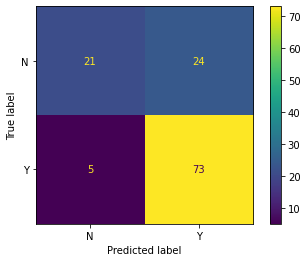

In [327]:
plot_confusion_matrix(log_transform,X_test_transform,y_test)

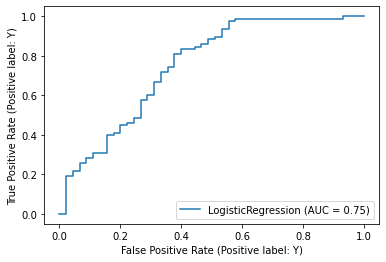

In [328]:
plot_roc_curve(log_transform,X_test_transform,y_test)

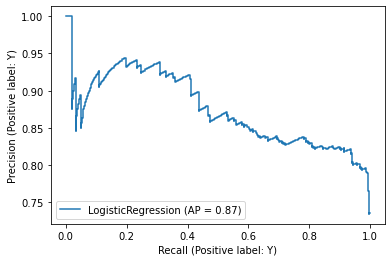

In [329]:
plot_precision_recall_curve(log_transform,X_train_transform,y_train)

In [330]:
#MODEL_WITH NORMALIZATION
from sklearn.model_selection import train_test_split                     #train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [331]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler_train = min_max_scaler.fit_transform(X_train)
min_max_scaler_test = min_max_scaler.transform(X_test)

In [332]:
print(min_max_scaler_train.shape)    #SHAPE OF NORMALIZED X_TRAIN 
print(y_train.shape)                #SHAPE OF NORMALIZED Y_TRAIN 
print(min_max_scaler_test.shape)    #SHAPE OF NORMALIZED X_TEST
print(y_test.shape)                  #SHAPE OF NORMALIZED Y_TRAIN

(429, 16)
(429,)
(185, 16)
(185,)


In [333]:
#LOGISTIC REGRESSION WITH NORMALIZATION ;

log_model_4 = LogisticRegression()                      #logistic regression object
log_model_4.fit(min_max_scaler_train,y_train)
log_model_4_pred = log_model_4.predict(min_max_scaler_test)
accuracy_score(y_test,log_model_4_pred)

0.7837837837837838

ACCURACY OF THISE LOGISTIC REGRESSION MODEL WITH NORMALIZATION IS 78.37%

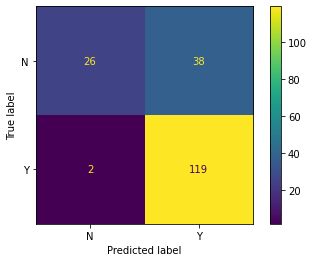

In [334]:
plot_confusion_matrix(log_model_4,min_max_scaler_test,y_test)

In [335]:
plot_roc_curve(log_model_4,min_max_scaler_test,y_test)

AUC OF THE NORMALIZATION IS 0.74

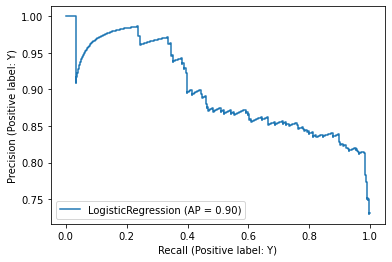

In [336]:
plot_precision_recall_curve(log_model_4,min_max_scaler_train,y_train)

In [337]:
#MODLE WITH CROSS_VALIDATION :
#STANDARD SCALER:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
standard_X_train=scaler.fit_transform(x)


In [338]:
#KFOLD_CROSS_VALIDATION:-

In [339]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
logistic_CV = LogisticRegression()
kfold_validation = KFold(5)                                   #K-FOLD WITH 5 FOLDS
k_fold_result = cross_val_score(logistic_CV,standard_X_train,y,cv=kfold_validation)
print(k_fold_result)                                          #Because of KFold=10 we have 10 differrent Accuracies


[0.80487805 0.75609756 0.80487805 0.85365854 0.81967213]


In [340]:
print(np.mean(k_fold_result))

0.8078368652538984


AVERAGE ACCURACY OF K-FOLD CROSS VALIDATION IS 80.78%

In [341]:
#STRATIFIED CROSS_VALIDATION:-

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
logistic_CV2 = LogisticRegression()
stratified_validation = StratifiedKFold(n_splits=5)
stratified_results = cross_val_score(logistic_CV2,standard_X_train,y,cv=stratified_validation)
print(stratified_results)

[0.81300813 0.77235772 0.7804878  0.85365854 0.81147541]


In [347]:
print(np.mean(stratified_results))

0.8061975209916034


AVERAGE ACCURACY OF STARTIFIED CROSS VALIDATION IS 80.61%

# KNN_MODEL:

In [578]:
#TRAIN_TEST_SPLIT:
from sklearn.model_selection import train_test_split                     #train_test_split

In [579]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
standard_X_train=scaler.fit_transform(X_train)
standard_X_test=scaler.transform(X_test)

In [580]:
print(standard_X_train.shape)
print(y_train.shape)
print(standard_X_test.shape)
print(y_test.shape)

(429, 16)
(429,)
(185, 16)
(185,)


HERE WE ARE APPLYINNG STANDARD_SCALER..

In [581]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_1 = KNeighborsClassifier()                 #we create a knn object
knn_model_1.fit(standard_X_train,y_train)
knn_pred = knn_model_1.predict(standard_X_test)

In [582]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score       
print(accuracy_score(knn_pred,y_test))              #ACCURACY OF THESE MODEL..
print(confusion_matrix(knn_pred,y_test))            #CONFUSION MATRIX..

0.7891891891891892
[[ 27   2]
 [ 37 119]]


In [353]:
print(classification_report(knn_pred,y_test))                        #CLASSIFICATION_REPORT

              precision    recall  f1-score   support

           N       0.42      0.93      0.58        29
           Y       0.98      0.76      0.86       156

    accuracy                           0.79       185
   macro avg       0.70      0.85      0.72       185
weighted avg       0.90      0.79      0.82       185



# ELBOW_METHOD:-

In [354]:
error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)          #KNN object
    knn_model.fit(standard_X_train,y_train) 
   
    y_pred_test = knn_model.predict(standard_X_test)         #HERE WE ARE PREDICTION IS HAPPEN
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    error_rates.append(test_error)

In [355]:
len(range(3,50))

47

Text(0.5, 0, 'K Value')

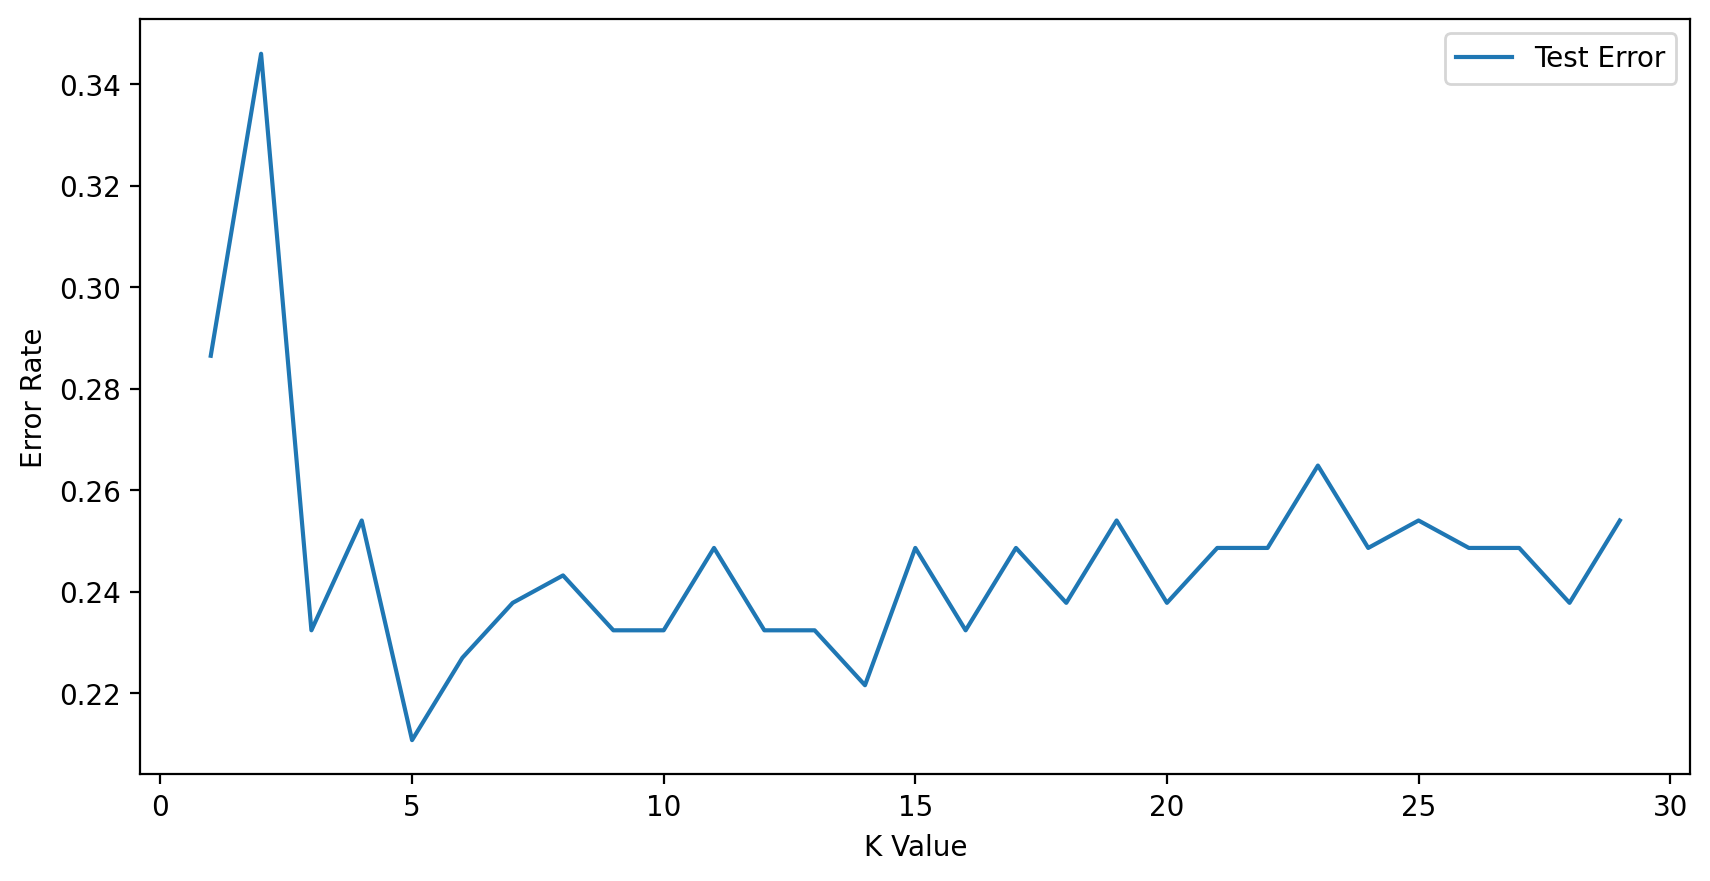

In [356]:
#HERE WE PLOTTING K VALUE'S WITH RESPECT TO ERROR'S:

plt.figure(figsize=(10,5),dpi=200)
plt.plot(range(1,30),error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')                                       #ERROR'S
plt.xlabel("K Value")                                          #K-VALUE'S

BY ELBOW METHOD WE CAN SEE THAT "5" NEIGHBOR'S AER GOOD FOR OUR MODEL


# FINAL MODEL :

In [475]:
#KNN_WITH STANDARD SCALER
#KNN-MODEL WITH 5 NEAREST NEIGHBOR'S:

knn_model_1 = KNeighborsClassifier(n_neighbors=5)  #KNN-OBJECT
knn_model_1.fit(standard_X_train,y_train) 
knn_pred = knn_model_1.predict(standard_X_test)     #PREDICTION'S OF KNN

ValueError: Found input variables with inconsistent numbers of samples: [614, 429]

In [360]:
#OUR FINAL MODEL:
print(accuracy_score(knn_pred,y_test))                 #FINAL MODEL
print(confusion_matrix(knn_pred,y_test))

0.7891891891891892
[[ 27   2]
 [ 37 119]]


5 NEIGHBORS ARE GOOD FOR OUR MODEL..IT GIVES US ACCURACY OF-78.91%

In [361]:
print(classification_report(knn_pred,y_test))                        #CLASSIFICATION_REPORT

              precision    recall  f1-score   support

           N       0.42      0.93      0.58        29
           Y       0.98      0.76      0.86       156

    accuracy                           0.79       185
   macro avg       0.70      0.85      0.72       185
weighted avg       0.90      0.79      0.82       185



In [362]:
from sklearn.metrics import plot_roc_curve,precision_recall_curve,plot_precision_recall_curve
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve,accuracy_score

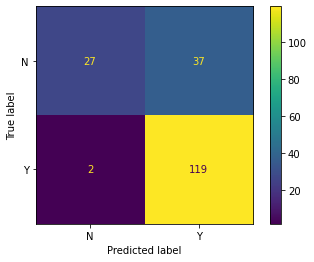

In [363]:
plot_confusion_matrix(knn_model_1,standard_X_test,y_test)

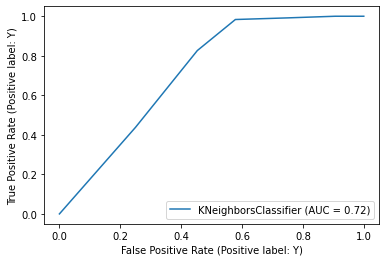

In [364]:
plot_roc_curve(knn_model_1,standard_X_test,y_test)

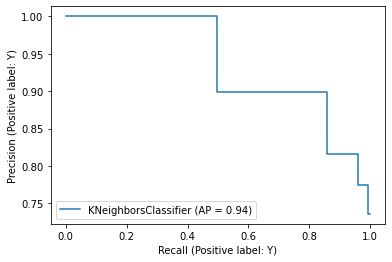

In [365]:
plot_precision_recall_curve(knn_model_1,standard_X_train,y_train)

In [366]:
#KNN_WITH NORMALIZED SCALER
from sklearn.model_selection import train_test_split                     #train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [367]:
#KNN_MODEL WITH NORMALIZATION
from sklearn.preprocessing import MinMaxScaler              
min_max_scaler = MinMaxScaler()                                 #MinMaxScaler OBJECT
min_max_train = min_max_scaler.fit_transform(X_train)
min_max_test = min_max_scaler.transform(X_test)

In [368]:
knn_model_2 = KNeighborsClassifier(n_neighbors=5)               #KNN_MODEL OBJECT
knn_model_2 = knn_model_2.fit(min_max_train,y_train)
knn_model_pred = knn_model_2.predict(min_max_test)
print(accuracy_score(knn_model_pred,y_test))             #ACCURACY OF KNN_MODEL WITH NORMALIZATION 
print(confusion_matrix(knn_model_pred,y_test))           #CONFUSION MATRIX

0.7351351351351352
[[ 21   6]
 [ 43 115]]


In [369]:
print(classification_report(knn_model_pred,y_test))                        #CLASSIFICATION_REPORT

              precision    recall  f1-score   support

           N       0.33      0.78      0.46        27
           Y       0.95      0.73      0.82       158

    accuracy                           0.74       185
   macro avg       0.64      0.75      0.64       185
weighted avg       0.86      0.74      0.77       185



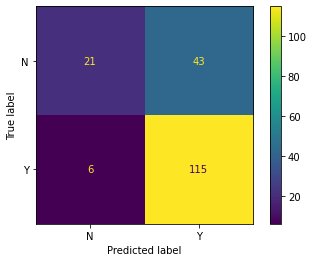

In [370]:
plot_confusion_matrix(knn_model_2,min_max_test,y_test)

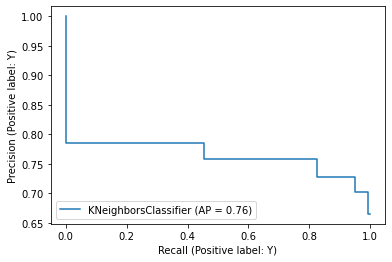

In [371]:
plot_precision_recall_curve(knn_model_2,min_max_test,y_test)

In [372]:
#KNN_MODEL WITH CROSS_VALIDATION :

In [373]:
#STANDARD SCALER:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
standard_X_train=scaler.fit_transform(x)

In [374]:
#K-FOLD CROSS_VALIDATION:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
knn_model_CV = KNeighborsClassifier(n_neighbors=7)             #we create a knn object
kfold_validation = KFold(7)                                      #K-FOLD WITH 5 FOLDS
knn_result = cross_val_score(knn_model_CV,standard_X_train,y,cv=kfold_validation)
print(knn_result)                   

[0.73863636 0.76136364 0.75       0.80681818 0.78409091 0.75862069
 0.7816092 ]


In [375]:
print(np.mean(knn_result))

0.7687341394237946


AVERAGE ACCURACY OF K-FOLD CROSS VALIDATION IS 76.87%

In [378]:
#STRATIFIED CROSS_VALIDATION:-

from sklearn.model_selection import StratifiedKFold
knn_CV_2 = KNeighborsClassifier(n_neighbors=7)                 #we create a knn object
stratified_validation = StratifiedKFold(n_splits=7)
knn_result = cross_val_score(knn_CV_2,standard_X_train,y,cv=stratified_validation)

print(knn_result)                                # HERE WE HAVE 7 DIFFERENT ACCURACIES BECAUSE WE TAKE 7 SPLITS.

[0.82954545 0.75       0.75       0.76136364 0.79545455 0.77011494
 0.7816092 ]


In [379]:
print(np.mean(knn_result))

0.7768696820420959


# Decision_tree:

In [380]:
from sklearn.model_selection import train_test_split                     #train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(X_train.shape)
print(y_train.shape)

(429, 16)
(429,)


In [381]:
from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier()              #DECISION TREE OBJECT 
decision_model.fit(X_train,y_train)
decision_pred = decision_model.predict(X_test)
accuracy_score(decision_pred,y_test)

0.6972972972972973

In [382]:
ACCURACY OF DECISION TREE IS 69.72%


SyntaxError: invalid syntax (2194406864.py, line 1)

In [383]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(decision_pred,y_test)

array([[34, 26],
       [30, 95]], dtype=int64)

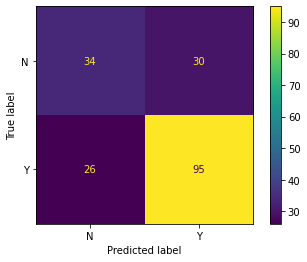

In [384]:
plot_confusion_matrix(decision_model,X_test,y_test)

In [385]:
print(classification_report(y_test,decision_pred))

              precision    recall  f1-score   support

           N       0.57      0.53      0.55        64
           Y       0.76      0.79      0.77       121

    accuracy                           0.70       185
   macro avg       0.66      0.66      0.66       185
weighted avg       0.69      0.70      0.69       185



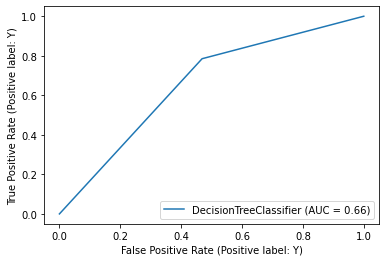

In [386]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(decision_model,X_test,y_test)

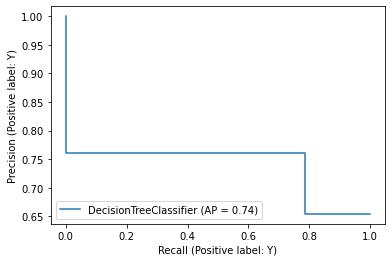

In [387]:
plot_precision_recall_curve(decision_model,X_test,y_test)

# PLOTING DECISION TREE;

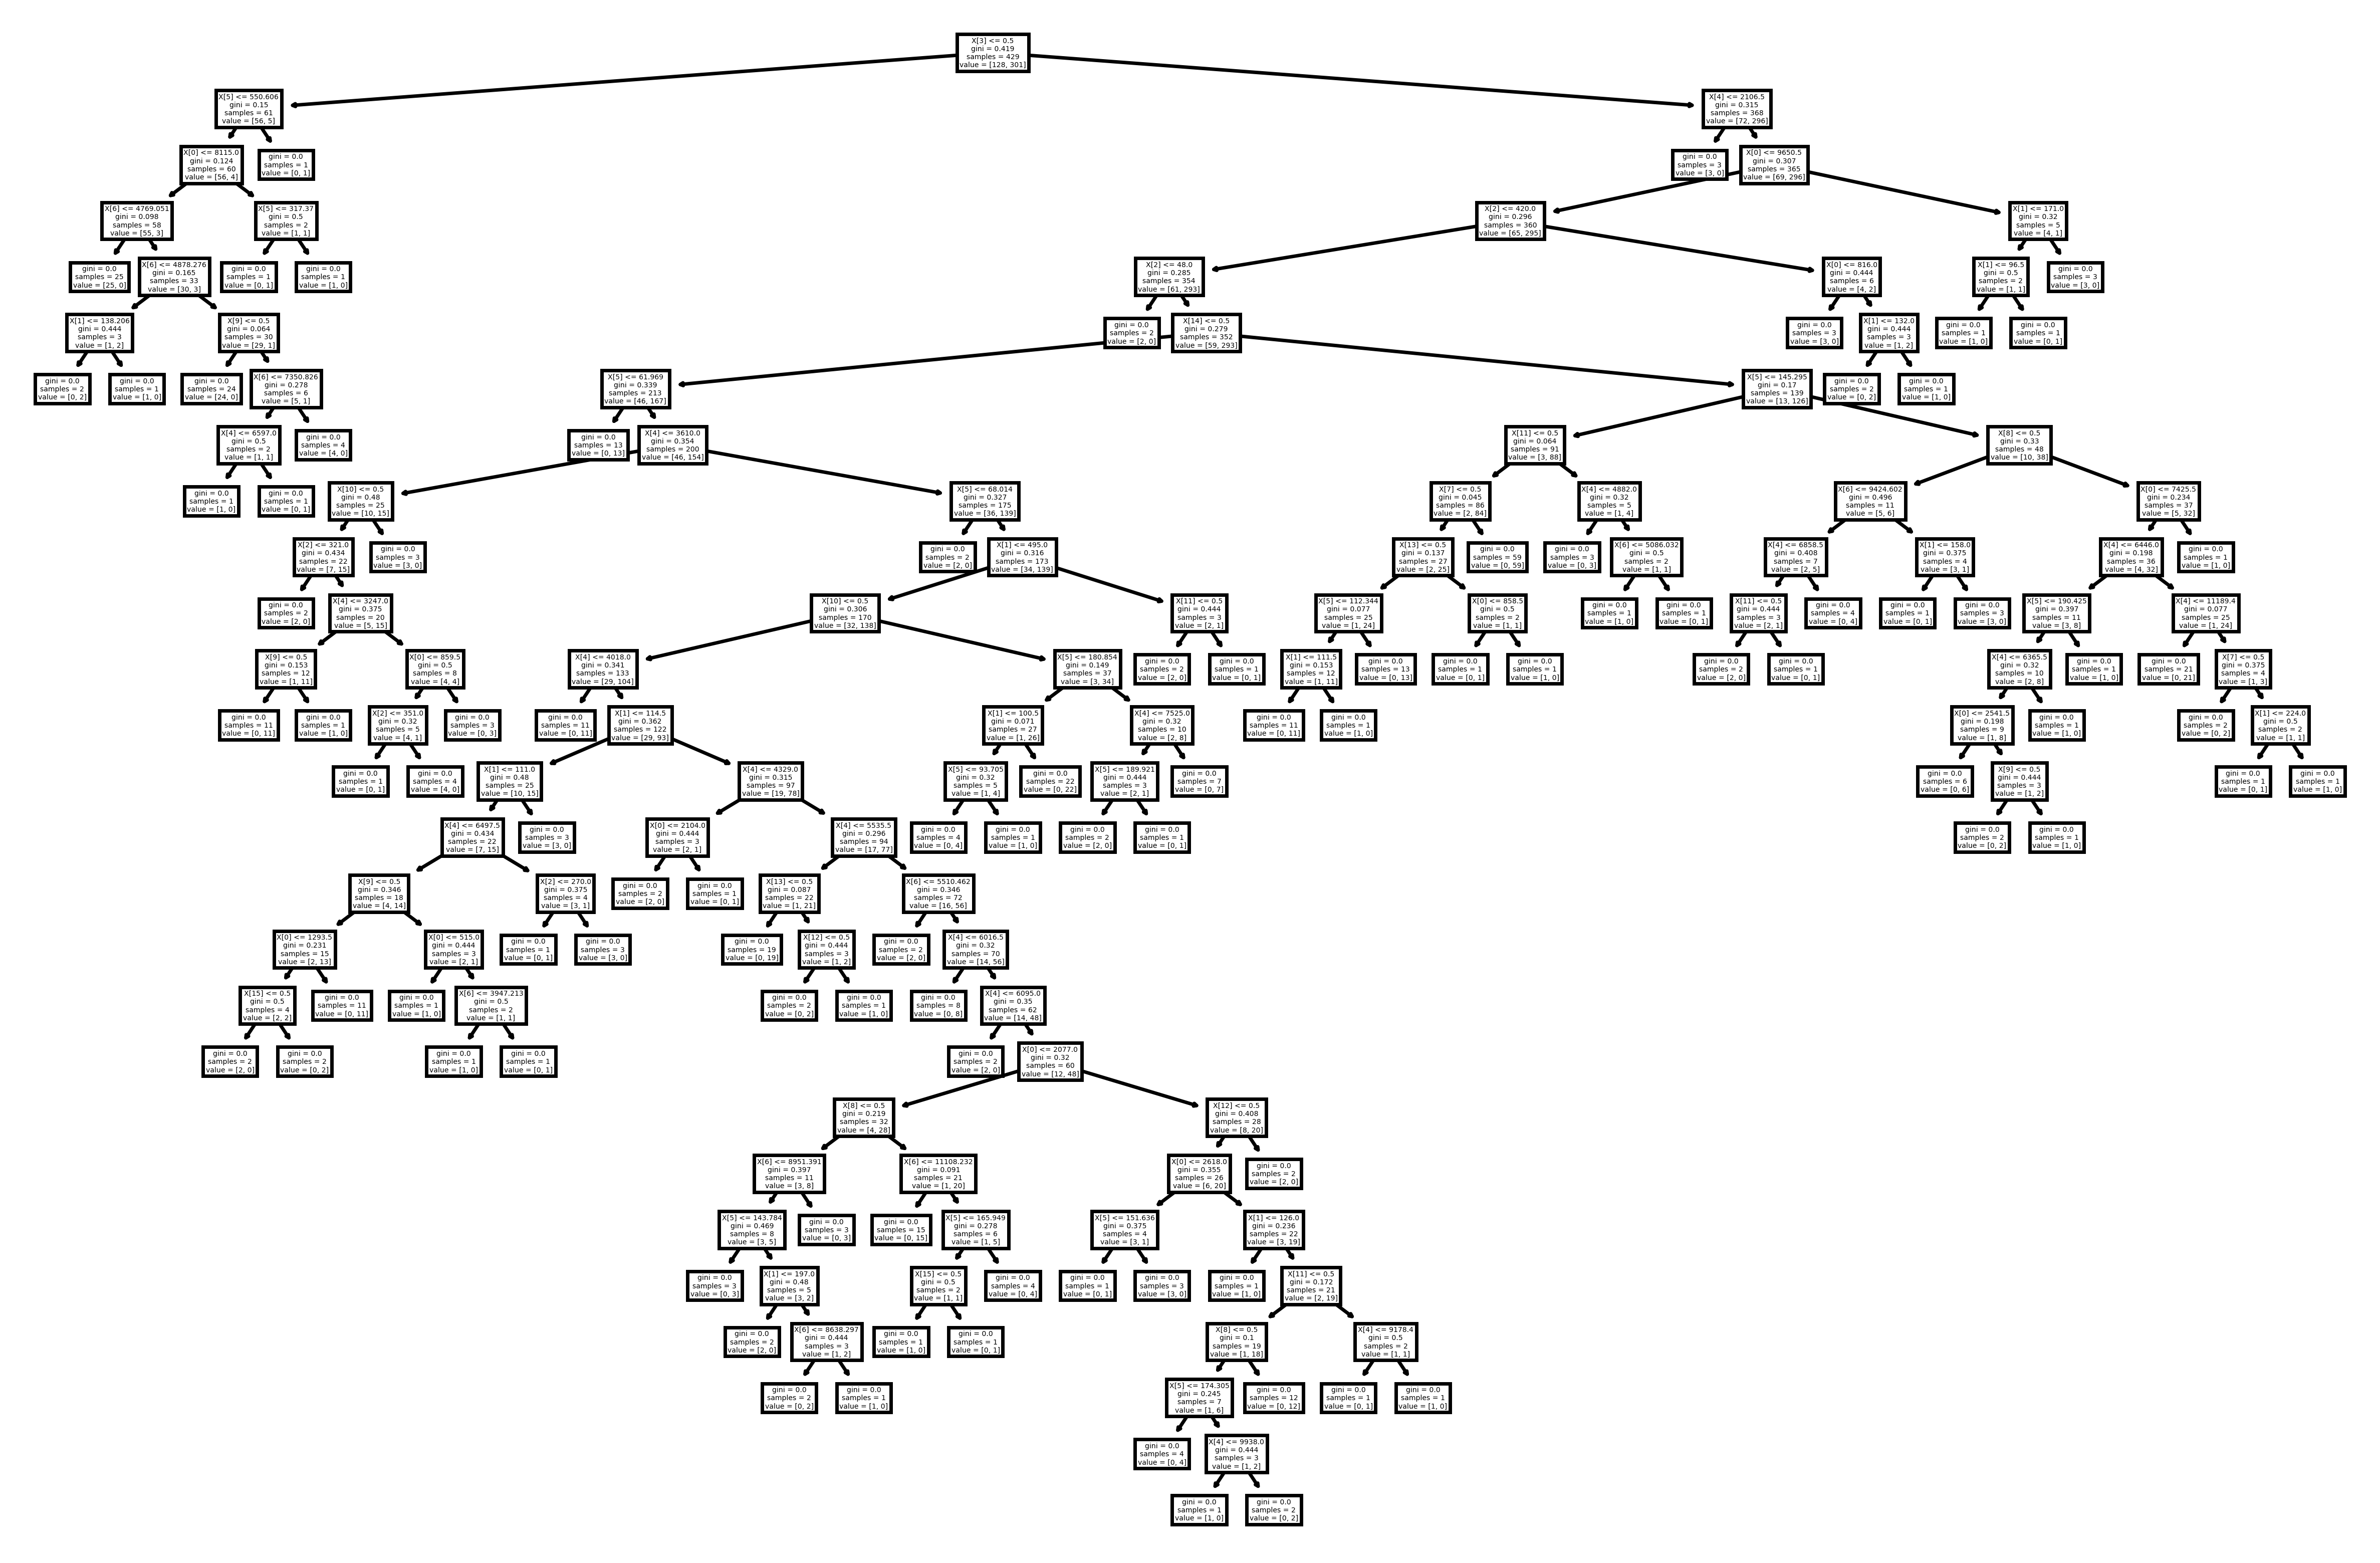

In [388]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=500)
plot_tree(decision_model);

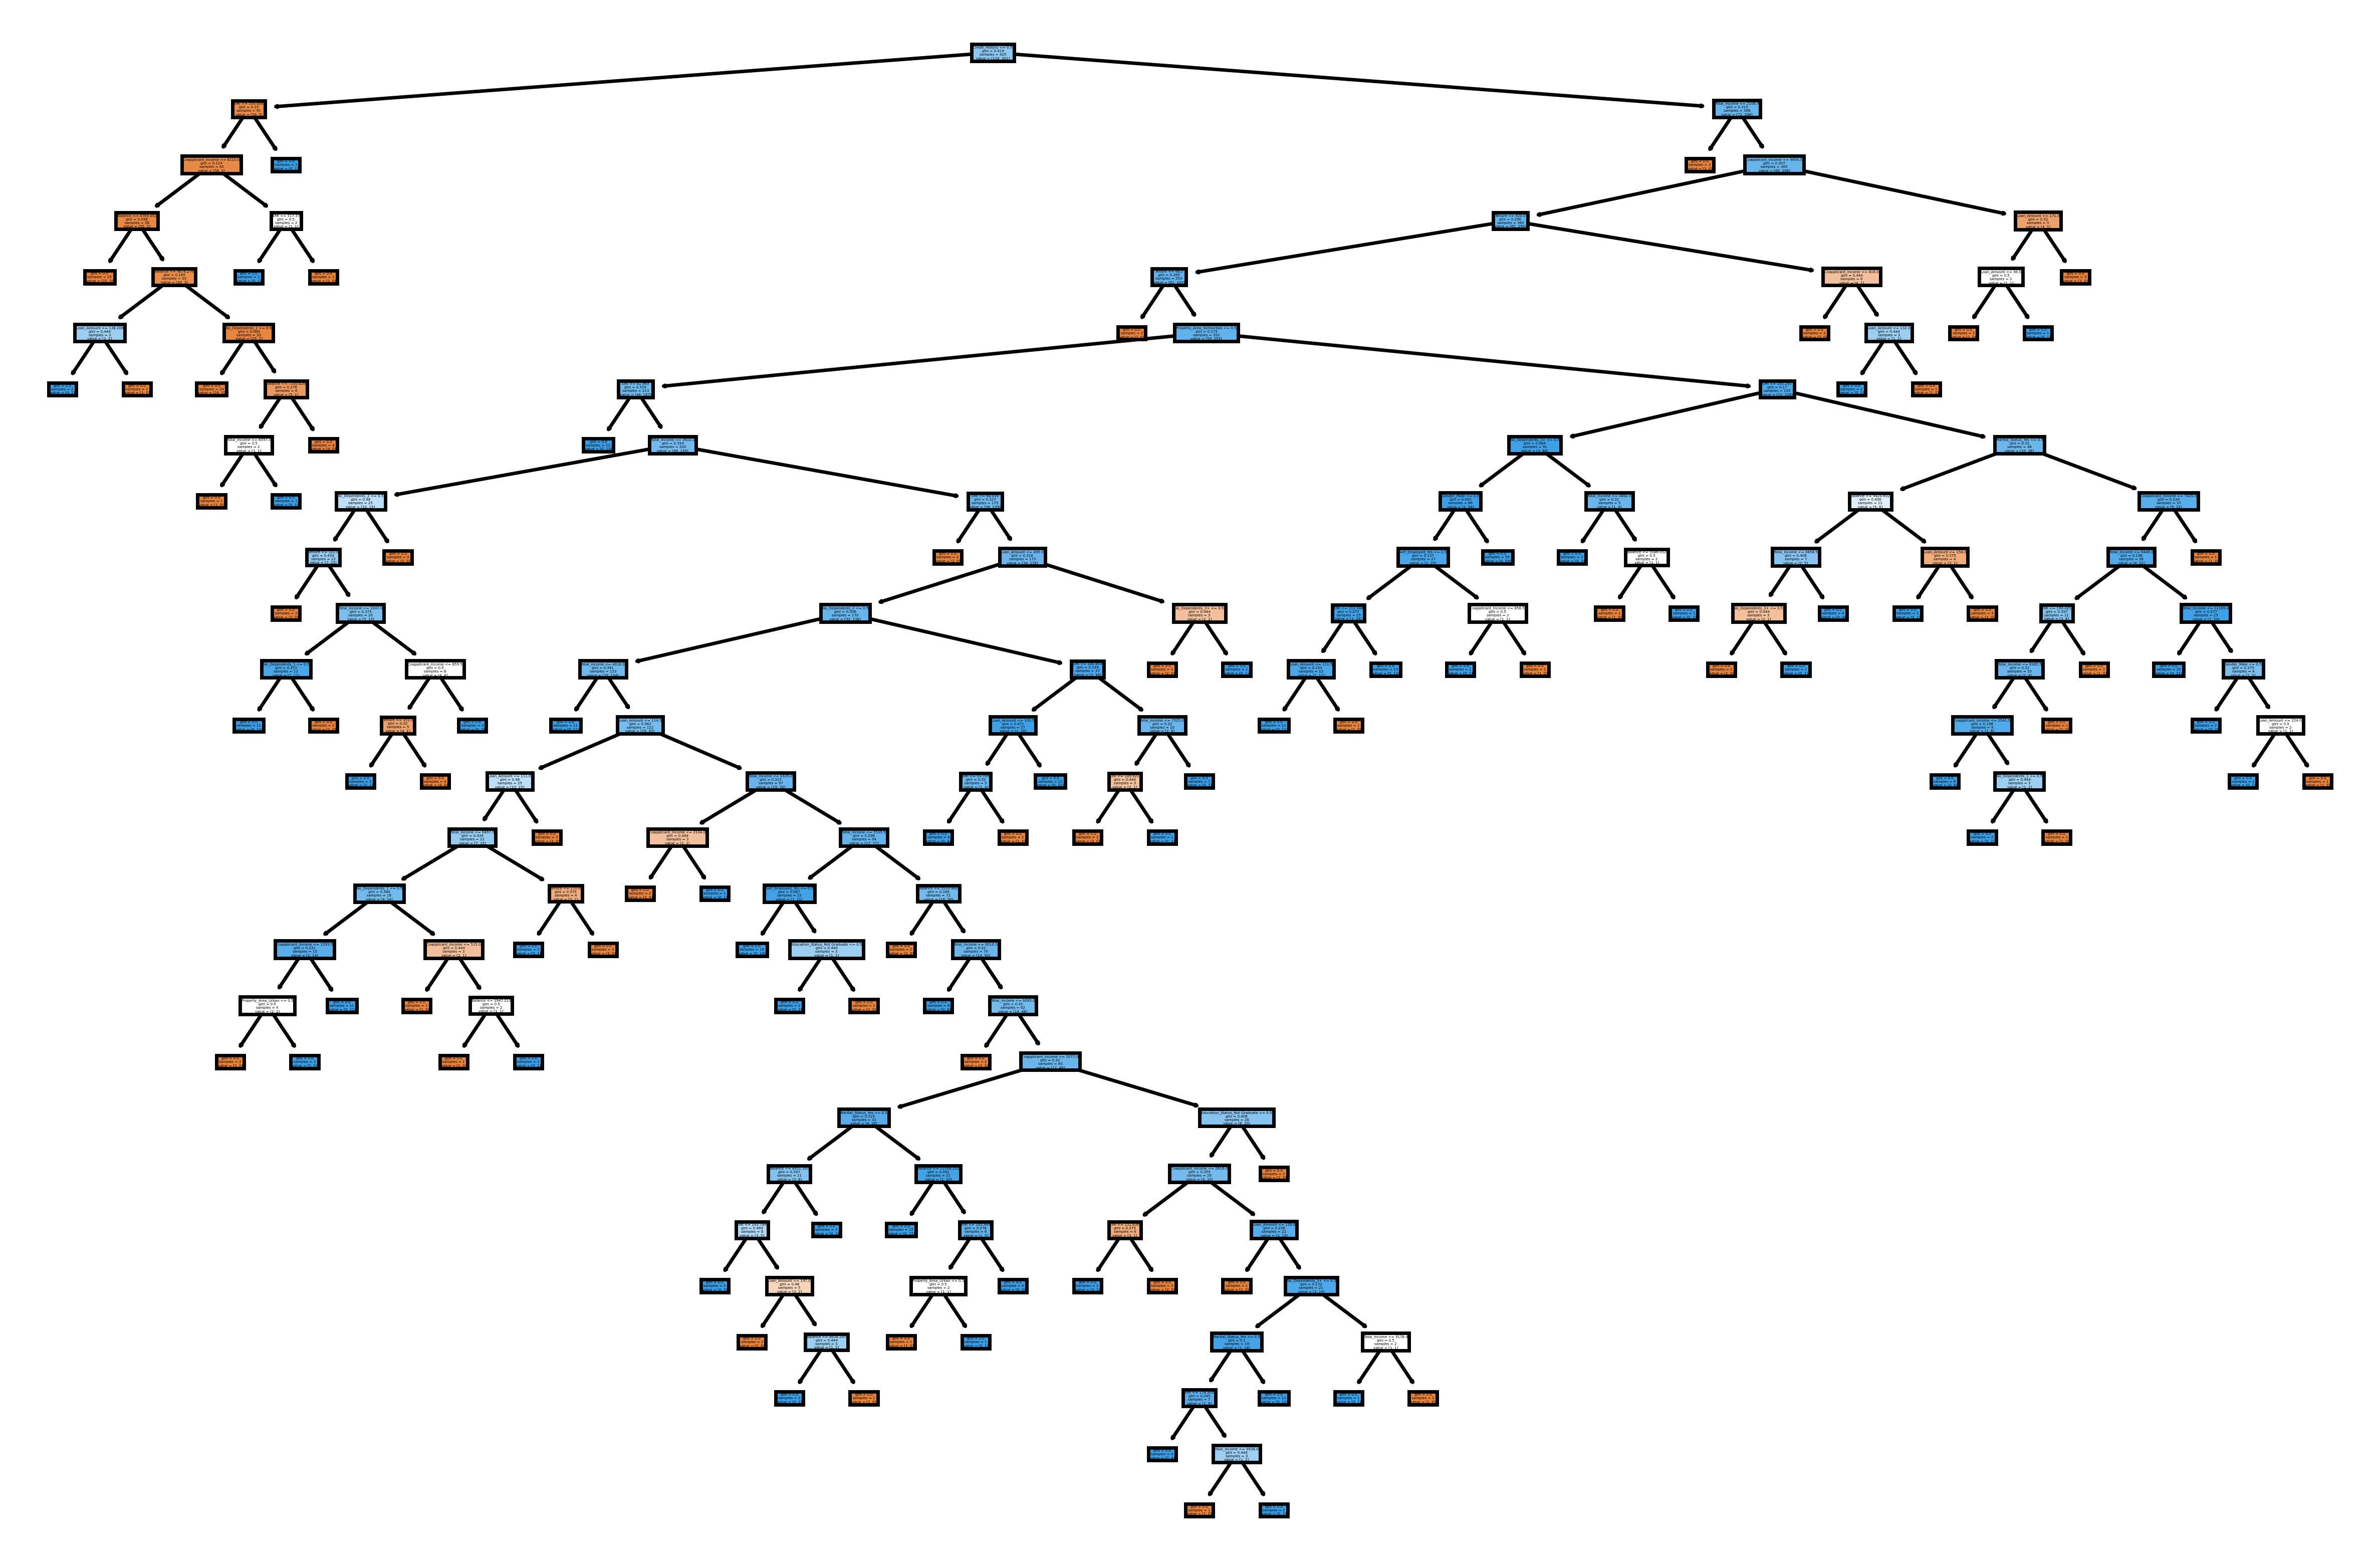

In [389]:
plt.figure(figsize=(12,8),dpi=500)
plot_tree(decision_model,filled=True,feature_names=x.columns);

In [390]:
def Decision_tree_model(model):

    decision_tree = decision_model.predict(X_test)
    print(classification_report(y_test,decision_tree))
    
    print('\n')
    
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(decision_model,filled=True,feature_names=x.columns);

In [391]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           N       0.57      0.53      0.55        64
           Y       0.76      0.79      0.77       121

    accuracy                           0.70       185
   macro avg       0.66      0.66      0.66       185
weighted avg       0.69      0.70      0.69       185





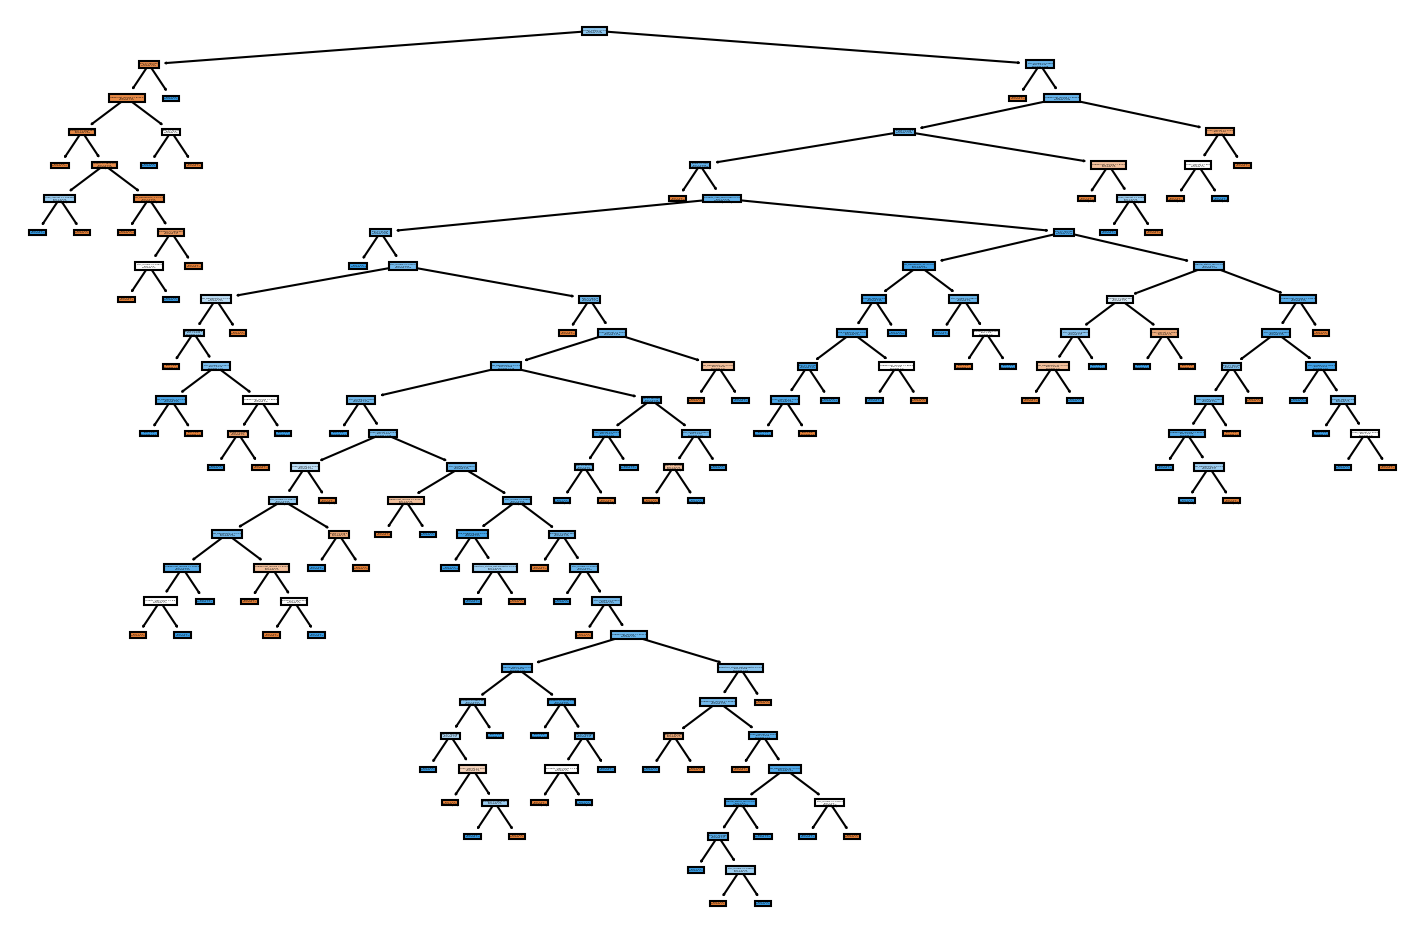

In [392]:
Decision_tree_model(pruned_tree)

In [393]:
tree_2 = DecisionTreeClassifier(max_depth=3)
tree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           N       0.57      0.53      0.55        64
           Y       0.76      0.79      0.77       121

    accuracy                           0.70       185
   macro avg       0.66      0.66      0.66       185
weighted avg       0.69      0.70      0.69       185





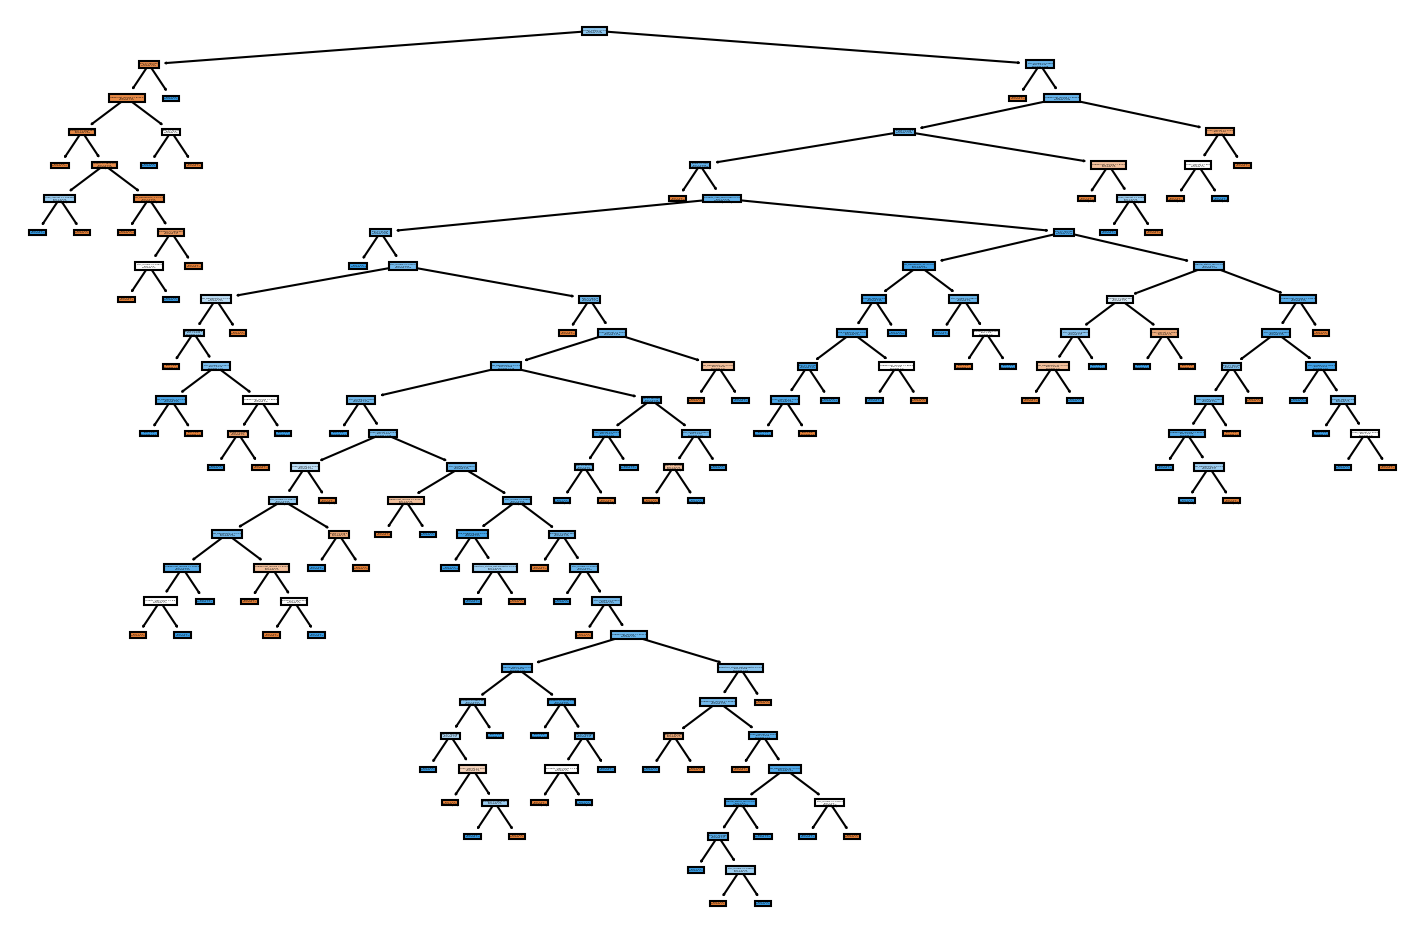

In [394]:
Decision_tree_model(tree_2)

USING MAX_DEPTH=2 AND MAX_DEPTH=3 ACCURACY DOES NOT CHANGED

In [395]:
#KFOLD_CROSS_VALIDATION:-
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
decision_tree_CV = DecisionTreeClassifier()                 #we create a Decision Tree object
kfold_validation = KFold(10)                                # K-FOLD WITH 10 FOLD 
DecisionTree_result = cross_val_score(decision_tree_CV,x,y,cv=kfold_validation)
print(DecisionTree_result)

[0.69354839 0.66129032 0.64516129 0.69354839 0.72131148 0.68852459
 0.78688525 0.72131148 0.68852459 0.75409836]


In [396]:
print(np.mean(DecisionTree_result))                 #AVERAGE ACCURACY OF DECISION TREE WITH CROSS VALIDATION 

0.7054204124801693


AVERAGE ACCURACY FOR K-FOLD CROSS VALIDATION IS 71.34%

In [397]:
#STRATIFIED CROSS_VALIDATION:-

from sklearn.model_selection import StratifiedKFold
DT_CV_2 = DecisionTreeClassifier()                 #we create a Decision Tree object
stratified_validation = StratifiedKFold(n_splits=10)
DT_2_result = cross_val_score(DT_CV_2,x,y,cv=stratified_validation)
print(DT_2_result)                                # HERE WE HAVE 10 DIFFERENT ACCURACIES BECAUSE WE TAKE 10 SPLITS. 

[0.62903226 0.72580645 0.61290323 0.69354839 0.75409836 0.70491803
 0.78688525 0.70491803 0.70491803 0.78688525]


In [398]:
print(np.mean(DT_2_result))                        #AVERAGE ACCURACY OF DECISION TREE WITH STRATIFIED CROSS VALIDATION 


0.7103913273400317


AVERAGE ACCURACY FOR STRATIFIED CROSS VALIDATION IS 71.03%


# Random Forest:

In [399]:

from sklearn.model_selection import train_test_split                     #train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(X_train.shape)
print(y_train.shape)

(429, 16)
(429,)


In [400]:
from sklearn.ensemble import RandomForestClassifier

ensemble_model_1=RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
ensemble_model_1.fit(X_train,y_train)
ensemble_pred=ensemble_model_1.predict(X_test)

In [401]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

print(accuracy_score(ensemble_pred,y_test))                       #ACCURACY OF RANDOM FOREST
print(confusion_matrix(y_test,ensemble_pred))                     #CONFUSION MATRIX

0.7405405405405405
[[ 32  32]
 [ 16 105]]


ACCURACY OF OUR RANDOM FOREST IS 74.06 % (with n_estimators=10,max_features='auto',random_state=101)


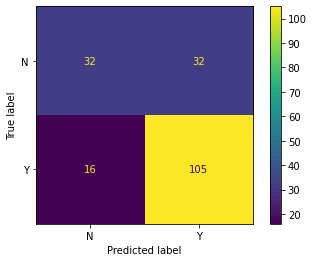

In [402]:
plot_confusion_matrix(ensemble_model_1,X_test,y_test)

In [403]:
print(classification_report(ensemble_pred,y_test))

              precision    recall  f1-score   support

           N       0.50      0.67      0.57        48
           Y       0.87      0.77      0.81       137

    accuracy                           0.74       185
   macro avg       0.68      0.72      0.69       185
weighted avg       0.77      0.74      0.75       185



In [404]:
#RANDOM FOREST MODEL 2:
from sklearn.ensemble import RandomForestClassifier

ensemble_model_2=RandomForestClassifier(n_estimators=144,max_features=5,random_state=101)
ensemble_model_2.fit(X_train,y_train)
ensemble_pred2=ensemble_model_2.predict(X_test)

In [405]:
print(accuracy_score(ensemble_pred2,y_test))                       #ACCURACY OF RANDOM FOREST

0.7621621621621621


ACCURACY OF RANDOM FOREST ALGORITHM (N-ESTIMATORS-144,MAX_FEATURES-5) IS 76.21%

# WITH GRID_SEARCH_CV:

In [406]:
#GRID_SEARCH_CV:
from sklearn.model_selection import GridSearchCV    

n_estimators=[5,7,9,12]
max_features=[2,3,4,5]
bootstrap=[True,False]
oob_score=[True,False]


In [407]:
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'bootstrap':bootstrap,
           'oob_score':oob_score}

In [408]:
random_forest = RandomForestClassifier()
grid=GridSearchCV(random_forest,param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [5, 7, 9, 12],
                         'oob_score': [True, False]})

In [409]:
grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 12, 'oob_score': True}

BEST PARAMETERS FOR OUR RANDOM FOREST BY GRID SEARCH CV.


In [410]:

#### APPLYING LOOP FOR RANDOM FOREST WITH n_estimators 1-15:

errors=[]

for i in range(1,15):
    
    randm_model=RandomForestClassifier(n_estimators=i,max_features= 5, bootstrap=True,
    oob_score=True)
    randm_model.fit(X_train,y_train)
    randm_pred=randm_model.predict(X_test)
    error=1-accuracy_score(randm_pred,y_test)
    errors.append(error)

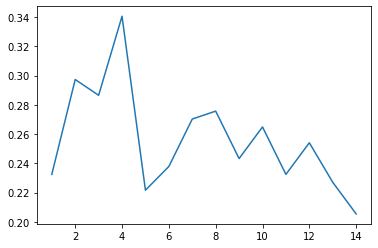

In [411]:
plt.plot(range(1,15),errors)

HERE WE CAN SEE THAT 28 ESTIMATOR'S ARE BEST FOR OUT MODEL BECAUSE ERROR RATE IS LESS FOR THAT ESIMATOR'S

In [413]:
#RANDOM FOREST WITH n_estimators=6,max_features=5,bootstrap=True,oob_score=True-

random_forest_2 = RandomForestClassifier(n_estimators=5,max_features=5,bootstrap=True,oob_score=True)
random_forest_2.fit(X_train,y_train)
random_forest_pred_2 = random_forest_2.predict(X_test)


In [414]:
print(accuracy_score(random_forest_pred_2,y_test))            #ACCURACY OF RANDOM FOREST 
print(confusion_matrix(random_forest_pred_2,y_test))          #CONFUSION MATRIX

0.745945945945946
[[ 29  12]
 [ 35 109]]


ACCURACY OF RANDOM FOREST IS 72.97% (with n_estimators=6,max_features=5,bootstrap=True,obb_score=true)

In [415]:
print(classification_report(random_forest_pred_2,y_test))

              precision    recall  f1-score   support

           N       0.45      0.71      0.55        41
           Y       0.90      0.76      0.82       144

    accuracy                           0.75       185
   macro avg       0.68      0.73      0.69       185
weighted avg       0.80      0.75      0.76       185



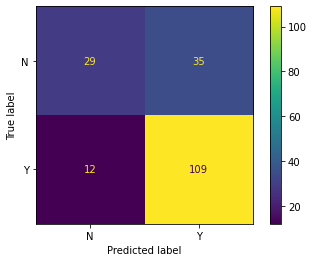

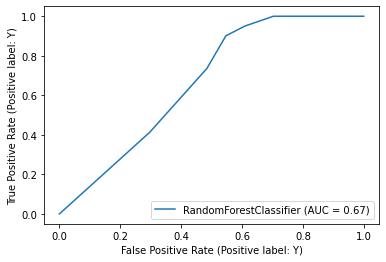

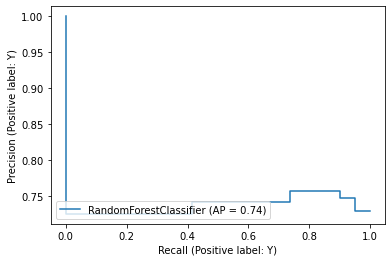

In [416]:
print(plot_confusion_matrix(random_forest_2,X_test,y_test))          #confusion matrix
print(plot_roc_curve(random_forest_2,X_test,y_test))                 #ROC_CURVE
print(plot_precision_recall_curve(random_forest_2,X_test,y_test))    #precision_recall_curve

In [417]:
#RANDOM FOREST WITH n_estimators=5,max_features=5,bootstrap=True,oob_score=True :

ensemble_model_3 = RandomForestClassifier(n_estimators=5,max_features=5,bootstrap=True,oob_score=True)
ensemble_model_3.fit(X_train,y_train)
ensemble_pred3=ensemble_model_3.predict(X_test)         #PREDICTION

In [418]:
print(accuracy_score(ensemble_pred3,y_test))                       #ACCURACY OF RANDOM FOREST

0.7567567567567568


THISE MODEL GIVES US GOOD ACCURACY OF 75.67%

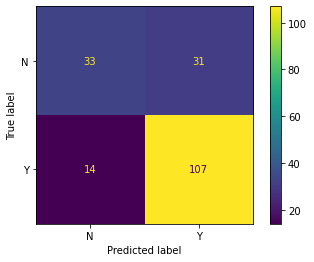

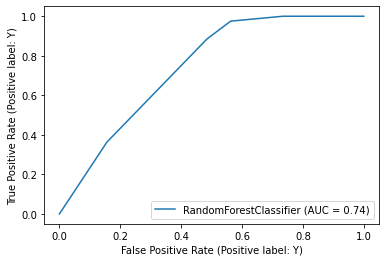

In [419]:
print(plot_confusion_matrix(ensemble_model_3,X_test,y_test))          #confusion matrix
print(plot_roc_curve(ensemble_model_3,X_test,y_test))                 #ROC_CURVE

In [420]:
#ensemble_model_3.feature_importances_

In [421]:
#KFOLD_CROSS_VALIDATION FOR RANDOM FOREST:-
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

random_forest_cv = RandomForestClassifier(n_estimators=5,max_features=5,bootstrap=True,oob_score=True)
kfold_validation = KFold(5)
random_forest_cv_result = cross_val_score(random_forest_cv,x,y,cv=kfold_validation)

print(random_forest_cv_result)

[0.71544715 0.67479675 0.76422764 0.77235772 0.77868852]


In [422]:
print(np.mean(random_forest_cv_result))    #AVERAGE ACCURACIES OF K_FOLD CROSS VALIDATION

0.7411035585765694


AVERAGE ACCURACIES OF K_FOLD CROSS VALIDATION IS 76.05%


In [423]:
#STRATIFIED CROSS_VALIDATION FOR RANDOM FOREST:-

from sklearn.model_selection import StratifiedKFold

rf_cv_2 = RandomForestClassifier(n_estimators=5,max_features=5,bootstrap=True,oob_score=True)#we create a Random Forest object

stratified_validation = StratifiedKFold(n_splits=10)        #STRATIFIED CROSS_VALIDATION WITH 10 SPLITS
rf_cv_2_results = cross_val_score(rf_cv_2,x,y,cv=stratified_validation)

print(rf_cv_2_results)                                # HERE WE HAVE 10 DIFFERENT ACCURACIES BECAUSE WE TAKE KFOLD-10. 

[0.74193548 0.72580645 0.74193548 0.72580645 0.68852459 0.7704918
 0.80327869 0.78688525 0.70491803 0.78688525]


In [424]:
print(np.mean(rf_cv_2_results))       #AVERAGE ACCURACIES OF STRATIFIED CROSS_VALIDATION

0.7476467477525119


AVERAGE ACCURACIES OF STRATIFIED CROSS_VALIDATION IS 74.44%

# AdaBoost Algorithm:


In [425]:
from sklearn.model_selection import train_test_split                     #train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
from sklearn.ensemble import AdaBoostClassifier

In [429]:
#Create adaboost classifier object:

ada_model = AdaBoostClassifier(n_estimators=100,learning_rate=1)

#n_estimators= means number of weak learners to train iteratively....
#learning_rate= it contributes to the weights of weak learners.it uses 1 as a default values

ada_model_1= ada_model.fit(X_train,y_train)
ada_model_pred = ada_model_1.predict(X_test)
accuracy_score(ada_model_pred,y_test)             #Accuracy of AdaBoost


0.7513513513513513

In [430]:
#ADA_BOOST FOR N_ESTIMATORS=2-60 :

ada_errors=[]

for i in range(2,60):
    
    ada_model=AdaBoostClassifier(n_estimators=i)          #ADA_BOOST OJECT
    ada_model.fit(X_train,y_train)
    ada_pred=ada_model.predict(X_test)
    
    error=1-accuracy_score(ada_pred,y_test)
    ada_errors.append(error)

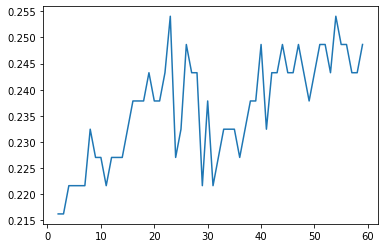

In [431]:
plt.plot(range(2,60),ada_errors)

In [432]:
ada_model_2 = AdaBoostClassifier(n_estimators=13,learning_rate=1)
ada_model_2= ada_model.fit(X_train,y_train)
ada_model_pred = ada_model_2.predict(X_test)
accuracy_score(ada_model_pred,y_test)             #Accuracy of AdaBoost

0.7513513513513513

ADA_BOOST ACCURACY IS 76.75% (with n_estimator=13,learning_rate=1)


In [433]:
print(classification_report(ada_model_pred,y_test))

              precision    recall  f1-score   support

           N       0.44      0.74      0.55        38
           Y       0.92      0.76      0.83       147

    accuracy                           0.75       185
   macro avg       0.68      0.75      0.69       185
weighted avg       0.82      0.75      0.77       185



[[ 28  10]
 [ 36 111]]


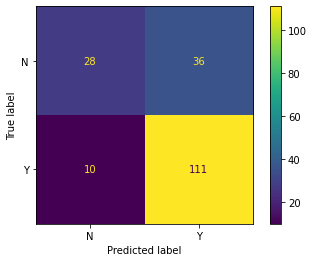

In [434]:
print(confusion_matrix(ada_model_pred,y_test))
print(plot_confusion_matrix(ada_model_2,X_test,y_test))            #CONFUSION MATRIX

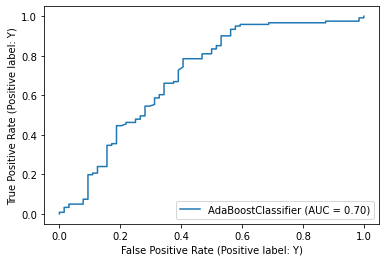

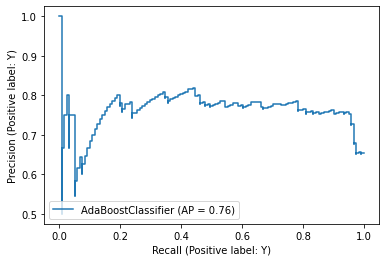

In [435]:
print(plot_roc_curve(ada_model_2,X_test,y_test))                       #ROC_CURVE
print(plot_precision_recall_curve(ada_model_2,X_test,y_test))          #PRECISION RECALL CURVE

In [436]:
#KFOLD_CROSS_VALIDATION FOR AdaBoost:-

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
adaboost_cv1 = AdaBoostClassifier()
kfold_validation = KFold(5)                                               #K-FOLD WITH 5 FOLDS
adaboost_cv1_result = cross_val_score(adaboost_cv1,x,y,cv=kfold_validation)
print(adaboost_cv1_result)

[0.7804878  0.77235772 0.82113821 0.82926829 0.75409836]


In [437]:
print(np.mean(adaboost_cv1_result))        #AVERAGE ACCURACY OF K-FOLD CROSS VALIDATION 

0.7914700786352126


In [438]:
#STRATIFIED CROSS_VALIDATION FOR AdaBoost:-

from sklearn.model_selection import StratifiedKFold
adaboost_cv_2 = AdaBoostClassifier()                       #we create a ababoost object
stratified_validation = StratifiedKFold(n_splits=7)        #STRATIFIED CROSS_VALIDATION WITH 7 SPLITS
adaboost_cv_2_results = cross_val_score(adaboost_cv_2,x,y,cv=stratified_validation)
print(adaboost_cv_2_results) 

[0.79545455 0.76136364 0.77272727 0.79545455 0.78409091 0.77011494
 0.82758621]


In [439]:
print(np.mean(adaboost_cv_2_results))        #AVERAGE ACCURACY OF STRATIFIED CROSS VALIDATION

0.7866845797880281


# Gradient_Boost Algorithm:

In [440]:
from sklearn.model_selection import train_test_split                     #train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 16)
(429,)
(185, 16)
(185,)


In [441]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_model = GradientBoostingClassifier()                 #GRADIENT_BOOST OBJECT
gradient_model = gradient_model.fit(X_train,y_train)
gradient_pred = gradient_model.predict(X_test)
accuracy_score(gradient_pred,y_test)             #Accuracy of GRADIENT_Boost

0.772972972972973

In [442]:
print(classification_report(gradient_pred,y_test))

              precision    recall  f1-score   support

           N       0.45      0.81      0.58        36
           Y       0.94      0.77      0.84       149

    accuracy                           0.77       185
   macro avg       0.70      0.79      0.71       185
weighted avg       0.85      0.77      0.79       185



[[ 29   7]
 [ 35 114]]


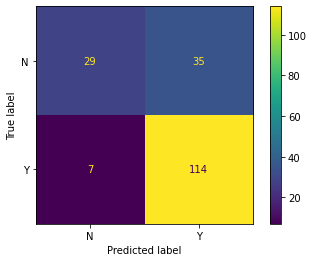

In [443]:
print(confusion_matrix(gradient_pred,y_test))
print(plot_confusion_matrix(gradient_model,X_test,y_test))      #CONFUSION MATRIX

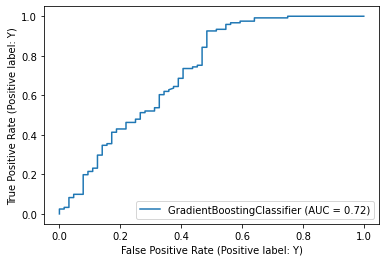

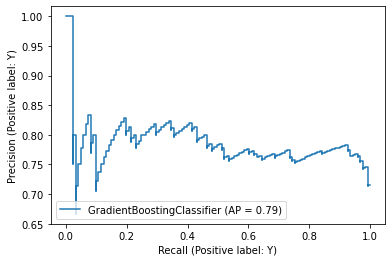

In [444]:
print(plot_roc_curve(gradient_model,X_test,y_test))                     #ROC & AUC CURVE
print(plot_precision_recall_curve(gradient_model,X_test,y_test))        #PRECISION RECALL CURVE

In [445]:
#KFOLD_CROSS_VALIDATION FOR RANDOM FOREST:-
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

gboost_cv1 = GradientBoostingClassifier()
kfold_validation = KFold(5)                                      # K-FOLD WITH 5 FOLDS 
gboost_cv1_result = cross_val_score(gboost_cv1,x,y,cv=kfold_validation)
print(gboost_cv1_result)

[0.7804878  0.72357724 0.79674797 0.82113821 0.79508197]


In [446]:
print(np.mean(gboost_cv1_result))

0.783406637345062


In [447]:
#STRATIFIED CROSS_VALIDATION FOR RANDOM FOREST:-

from sklearn.model_selection import StratifiedKFold

gboost_cv_2 = GradientBoostingClassifier()                               #we create a Gradient_Boost object
stratified_validation = StratifiedKFold(n_splits=7)                      #STRATIFIED CROSS_VALIDATION WITH 7 SPLITS
gboost_cv_2_results = cross_val_score(gboost_cv_2,x,y,cv=stratified_validation)
print(gboost_cv_2_results) 

[0.80681818 0.71590909 0.69318182 0.80681818 0.81818182 0.79310345
 0.85057471]


In [448]:
print(np.mean(gboost_cv_2_results))


0.7835124645469473


# CONCLUSION:

KNN-MODEL GIVES US BETTER ACCURACY-78.91%

From all the observations we can say that KNN performs well or accuracy of KNN is good as compare to other algorithms, And it is a simple algorithm.So in last we are going to use the KNN as our final model.

 

# TEST OUR FINAL ML MODEL ON DIFFERENT TEST DATA :

In [449]:
import os

In [450]:
os.getcwd()

'C:\\Users\\Vikrant'

In [451]:
pwd()


'C:\\Users\\Vikrant'

In [452]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 6034-31E3

 Directory of C:\Users\Vikrant

06/28/2023  11:55 AM    <DIR>          .
06/28/2023  11:55 AM    <DIR>          ..
10/09/2022  06:04 PM    <DIR>          .conda
10/09/2022  04:36 PM                25 .condarc
10/09/2022  04:35 PM    <DIR>          .continuum
06/27/2023  12:27 PM    <DIR>          .ipynb_checkpoints
10/09/2022  04:41 PM    <DIR>          .ipython
10/09/2022  04:40 PM    <DIR>          .jupyter
01/12/2023  05:36 PM    <DIR>          .keras
10/22/2022  11:54 AM    <DIR>          .matplotlib
10/08/2022  11:52 AM    <DIR>          3D Objects
01/29/2023  12:57 PM    <DIR>          6. Deep Learning
01/29/2023  12:54 PM    <DIR>          7. NLP
01/29/2023  12:39 PM        91,457,083 7. NLPvp.zip
12/11/2022  10:45 AM           223,234 Adult.csv
12/10/2022  07:06 PM         3,974,305 adult.data
12/11/2022  09:54 AM         2,003,153 adult.test.csv
10/09/2022  06:04 PM    <DIR>          anaconda3
12/09/2022  01:

In [453]:
test = pd.read_csv('test.csv')
test.head()

Loan_ID   Sex Marital_Status No_Dependents Education_Status Self_Employed  \
0  LP001015  Male            Yes             0         Graduate            No   
1  LP001022  Male            Yes             1         Graduate            No   
2  LP001031  Male            Yes             2         Graduate            No   
3  LP001035  Male            Yes             2         Graduate            No   
4  LP001051  Male             No             0     Not Graduate            No   

   Income  Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
0    5720                   0        110.0   360.0             1.0   
1    3076                1500        126.0   360.0             1.0   
2    5000                1800        208.0   360.0             1.0   
3    2340                2546        100.0   360.0             NaN   
4    3276                   0         78.0   360.0             1.0   

  Property_Area  
0         Urban  
1         Urban  
2         Urban  
3         Urban  
4         Urban

In [454]:
print(test.shape)                             #SHAPE OF OUR DATA
print(test.columns)                           #COLUMNS IN OUR DATA

(367, 12)
Index(['Loan_ID', 'Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Income', 'Coapplicant_Income', 'Loan_Amount',
       'Tenure', 'Credit_History', 'Property_Area'],
      dtype='object')


In [455]:
test.set_index('Loan_ID',inplace=True)
test.head()

Sex Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                      
LP001015  Male            Yes             0         Graduate            No   
LP001022  Male            Yes             1         Graduate            No   
LP001031  Male            Yes             2         Graduate            No   
LP001035  Male            Yes             2         Graduate            No   
LP001051  Male             No             0     Not Graduate            No   

          Income  Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                                     
LP001015    5720                   0        110.0   360.0             1.0   
LP001022    3076                1500        126.0   360.0             1.0   
LP001031    5000                1800        208.0   360.0             1.0   
LP001035    2340                2546        100.0   360.0             NaN   
LP001051    3276                   0         78.0   360.0             1.0   

         Property_Area  
Loan_ID                 
LP001015         Urban  
LP001022         Urban  
LP001031         Urban  
LP001035         Urban  
LP001051         Urban

In [456]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 356 non-null    object 
 1   Marital_Status      367 non-null    object 
 2   No_Dependents       357 non-null    object 
 3   Education_Status    367 non-null    object 
 4   Self_Employed       344 non-null    object 
 5   Income              367 non-null    int64  
 6   Coapplicant_Income  367 non-null    int64  
 7   Loan_Amount         362 non-null    float64
 8   Tenure              361 non-null    float64
 9   Credit_History      338 non-null    float64
 10  Property_Area       367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 34.4+ KB


In [457]:
test.isnull().sum()

Sex                   11
Marital_Status         0
No_Dependents         10
Education_Status       0
Self_Employed         23
Income                 0
Coapplicant_Income     0
Loan_Amount            5
Tenure                 6
Credit_History        29
Property_Area          0
dtype: int64

<AxesSubplot:ylabel='Loan_ID'>

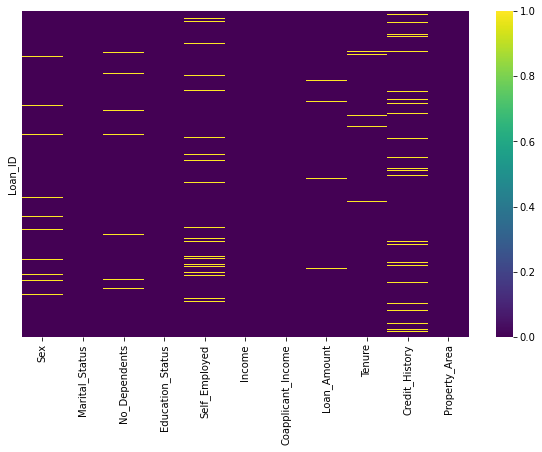

In [458]:
plt.figure(figsize=(10,6))
sns.heatmap(test.isnull(),yticklabels=False,cmap='viridis')

In [459]:
test['Sex'].value_counts()

Male      286
Female     70
Name: Sex, dtype: int64

In [460]:
test['Sex'].fillna(value='Male',inplace=True)
test['Sex'].isnull().sum()

0

In [461]:
test['No_Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: No_Dependents, dtype: int64

In [462]:
test['No_Dependents'].fillna(value='0',inplace=True)
test['No_Dependents'].isnull().sum()

0

In [463]:
test.isnull().sum()

Sex                    0
Marital_Status         0
No_Dependents          0
Education_Status       0
Self_Employed         23
Income                 0
Coapplicant_Income     0
Loan_Amount            5
Tenure                 6
Credit_History        29
Property_Area          0
dtype: int64

<AxesSubplot:ylabel='Loan_ID'>

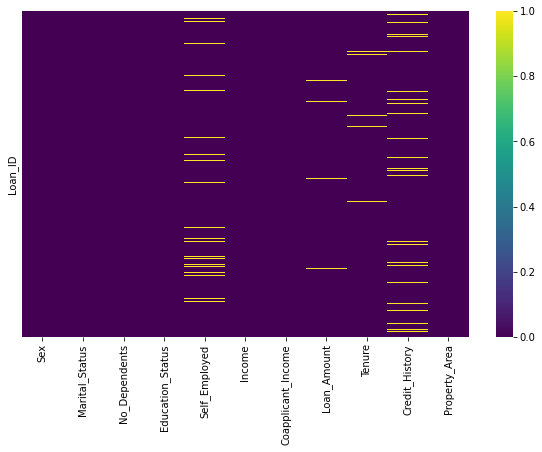

In [464]:
plt.figure(figsize=(10,6))
sns.heatmap(test.isnull(),yticklabels=False,cmap='viridis')

In [465]:
#DERIVED VARIABLES:
test['Total_Income'] = test['Income']+test['Coapplicant_Income']
test.head()

Sex Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                      
LP001015  Male            Yes             0         Graduate            No   
LP001022  Male            Yes             1         Graduate            No   
LP001031  Male            Yes             2         Graduate            No   
LP001035  Male            Yes             2         Graduate            No   
LP001051  Male             No             0     Not Graduate            No   

          Income  Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                                     
LP001015    5720                   0        110.0   360.0             1.0   
LP001022    3076                1500        126.0   360.0             1.0   
LP001031    5000                1800        208.0   360.0             1.0   
LP001035    2340                2546        100.0   360.0             NaN   
LP001051    3276                   0         78.0   360.0             1.0   

         Property_Area  Total_Income  
Loan_ID                               
LP001015         Urban          5720  
LP001022         Urban          4576  
LP001031         Urban          6800  
LP001035         Urban          4886  
LP001051         Urban          3276

In [466]:
Interest=9/12/100+1
Interest

1.0075

In [467]:
test['EMI']=(test['Loan_Amount']*Interest*(1+Interest)**test['Tenure']/(1+Interest)**test['Tenure']-1)
test.head()

Sex Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                      
LP001015  Male            Yes             0         Graduate            No   
LP001022  Male            Yes             1         Graduate            No   
LP001031  Male            Yes             2         Graduate            No   
LP001035  Male            Yes             2         Graduate            No   
LP001051  Male             No             0     Not Graduate            No   

          Income  Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                                     
LP001015    5720                   0        110.0   360.0             1.0   
LP001022    3076                1500        126.0   360.0             1.0   
LP001031    5000                1800        208.0   360.0             1.0   
LP001035    2340                2546        100.0   360.0             NaN   
LP001051    3276                   0         78.0   360.0             1.0   

         Property_Area  Total_Income      EMI  
Loan_ID                                        
LP001015         Urban          5720  109.825  
LP001022         Urban          4576  125.945  
LP001031         Urban          6800  208.560  
LP001035         Urban          4886   99.750  
LP001051         Urban          3276   77.585

In [468]:
test['Balance'] = test['Total_Income']-test['EMI']
test.head()

Sex Marital_Status No_Dependents Education_Status Self_Employed  \
Loan_ID                                                                      
LP001015  Male            Yes             0         Graduate            No   
LP001022  Male            Yes             1         Graduate            No   
LP001031  Male            Yes             2         Graduate            No   
LP001035  Male            Yes             2         Graduate            No   
LP001051  Male             No             0     Not Graduate            No   

          Income  Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                                     
LP001015    5720                   0        110.0   360.0             1.0   
LP001022    3076                1500        126.0   360.0             1.0   
LP001031    5000                1800        208.0   360.0             1.0   
LP001035    2340                2546        100.0   360.0             NaN   
LP001051    3276                   0         78.0   360.0             1.0   

         Property_Area  Total_Income      EMI   Balance  
Loan_ID                                                  
LP001015         Urban          5720  109.825  5610.175  
LP001022         Urban          4576  125.945  4450.055  
LP001031         Urban          6800  208.560  6591.440  
LP001035         Urban          4886   99.750  4786.250  
LP001051         Urban          3276   77.585  3198.415

In [469]:
test.corr()

Income  Coapplicant_Income  Loan_Amount    Tenure  \
Income              1.000000           -0.110335     0.493451  0.023249   
Coapplicant_Income -0.110335            1.000000     0.150850 -0.010984   
Loan_Amount         0.493451            0.150850     1.000000  0.094950   
Tenure              0.023249           -0.010984     0.094950  1.000000   
Credit_History      0.099553           -0.071235    -0.012578 -0.053593   
Total_Income        0.894934            0.344733     0.533378  0.017026   
EMI                 0.493017            0.151341     1.000000  0.094950   
Balance             0.894840            0.347767     0.524306  0.018286   

                    Credit_History  Total_Income       EMI   Balance  
Income                    0.099553      0.894934  0.493017  0.894840  
Coapplicant_Income       -0.071235      0.344733  0.151341  0.347767  
Loan_Amount              -0.012578      0.533378  1.000000  0.524306  
Tenure                   -0.053593      0.017026  0.094950  0.018286  
Credit_History            1.000000      0.062023 -0.018651  0.049353  
Total_Income              0.062023      1.000000  0.532870  0.999949  
EMI                      -0.018651      0.532870  1.000000  0.524306  
Balance                   0.049353      0.999949  0.524306  1.000000

<AxesSubplot:>

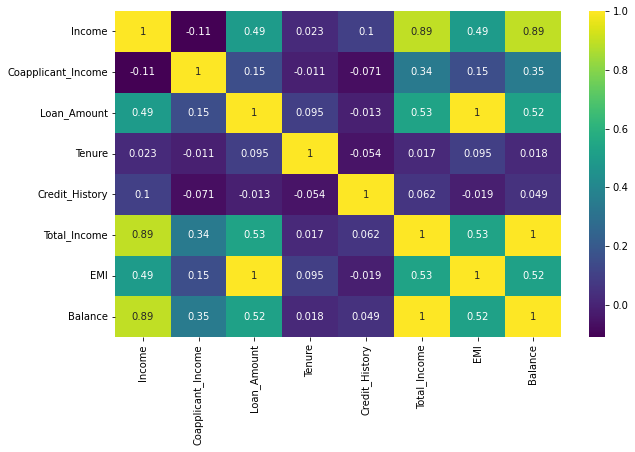

In [470]:
plt.figure(figsize=(10,6))
sns.heatmap(test.corr(),yticklabels=True,cmap='viridis',annot=True)

In [471]:
#creating dummy variables :

x=pd.get_dummies(test,drop_first=True)      
x.head()

Income  Coapplicant_Income  Loan_Amount  Tenure  Credit_History  \
Loan_ID                                                                     
LP001015    5720                   0        110.0   360.0             1.0   
LP001022    3076                1500        126.0   360.0             1.0   
LP001031    5000                1800        208.0   360.0             1.0   
LP001035    2340                2546        100.0   360.0             NaN   
LP001051    3276                   0         78.0   360.0             1.0   

          Total_Income      EMI   Balance  Sex_Male  Marital_Status_Yes  \
Loan_ID                                                                   
LP001015          5720  109.825  5610.175         1                   1   
LP001022          4576  125.945  4450.055         1                   1   
LP001031          6800  208.560  6591.440         1                   1   
LP001035          4886   99.750  4786.250         1                   1   
LP001051          3276   77.585  3198.415         1                   0   

          No_Dependents_1  No_Dependents_2  No_Dependents_3+  \
Loan_ID                                                        
LP001015                0                0                 0   
LP001022                1                0                 0   
LP001031                0                1                 0   
LP001035                0                1                 0   
LP001051                0                0                 0   

          Education_Status_Not Graduate  Self_Employed_Yes  \
Loan_ID                                                      
LP001015                              0                  0   
LP001022                              0                  0   
LP001031                              0                  0   
LP001035                              0                  0   
LP001051                              1                  0   

          Property_Area_Semiurban  Property_Area_Urban  
Loan_ID                                                 
LP001015                        0                    1  
LP001022                        0                    1  
LP001031                        0                    1  
LP001035                        0                    1  
LP001051                        0                    1

In [472]:
x.shape

(367, 17)

In [583]:
#APPLYING THE MOST STABLE OR GOOD MODEL FOR PREDICTION :
#PREDICTIONS FROM KNN MODEL;

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()                                        #STANDARD SCALER OBJECT
scaled_x = scaler.fit_transform(x)

print(scaled_x.shape)

(614, 16)


In [584]:
final_prediction = knn_model_1.predict(scaled_x)

In [585]:
final_prediction.shape               # SHAPE OF THE FINAL PREDICTION

(614,)

HERE WE PREDICTED A NEW TEST DATA AND NOW WE HAVE RESULTS OF NEW TEST DATA

In [586]:
dataframe = pd.DataFrame({'results':final_prediction})      #HERE WE CREATED A DATAFRAME

In [587]:
dataframe

results
0         Y
1         Y
2         Y
3         Y
4         Y
..      ...
609       Y
610       Y
611       Y
612       Y
613       N

[614 rows x 1 columns]

In [588]:
data_excel = pd.ExcelWriter('FINAL_PREDICTIONS.xlsx',engine='xlsxwriter')

In [589]:
dataframe.to_excel(data_excel,sheet_name='sheet1')
data_excel.save()

In [590]:
#BY USING .SAVE HERE WE SAVED THE PREDICTIONS IN EXCEL FILE :